# Sprint 6: Algoritmos de aprendizaje supervisado: Regresión con Boston Housing Data

**<h1>Descripción</h1>** 

**<b><h3>Ejercicios por practicar con regresiones con ScikitLearn a partir de un dataset con información sobre las viviendas del suburbio de Houston.</h3></b>**

<div class="alert alert-info alert-info"><b><h1>Objetivo</h1></b>
    
**Crear de modelos de regresión con el dataset suministrado, asi como utilizar las métricas para interpretar los resultados.**
</div>

<div class="alert alert-success alert-success"><b><h1>Actividades a realizar:</h1></b>

 **Ejercicio 1**: Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto. 
 
 **Ejercicio 2** : Comparar en base al MSE y al R2.  

 **Ejercicio 3** : Entrenar utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.
 
 **Ejercicio 4** : Comparar su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).

 **Ejercicio 5** : No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

</div>

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

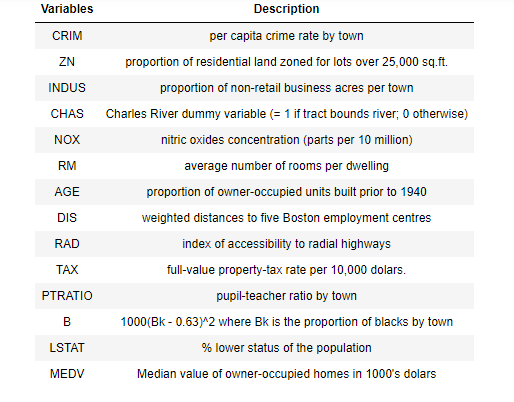

In [1]:
# import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joypy
from joypy import joyplot
import missingno as msno

# Import the module for the split
from sklearn.model_selection import train_test_split

#import libreries to statitics
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

#Import the module for the preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h2>Carga del Dataset</h2></b> 
</div>

In [3]:
housing_data= pd.read_csv('housing data.csv',  header=None)
housing_data

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

<h3>Observaciones:</h3>

   *  El dataset posee 506 filas y 14 columnas. 
   *  No posee los nombres de las variables o columnas, por lo que se procederá a colocarle los nombres, de acuerdo a la información suministrada(housing data description).  
   *  Se verificará los tipos las variables. 
   *  Se verificará si hay valores nulos o NaN, así como si existen valores duplicados.   

## 1. Preparación del Dataset

### 1.1. Agregar los nombres de las variables o columnas

In [4]:
header = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data.columns = header
housing_data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### 1.2 Verificar nulos y NaM

In [6]:
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
housing_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

* Como se pueden observar no hay valores faltantes ni NAN en el dataset, comprobando la información suministrada. La gráfica msno es una manera visual de verificar la distribucción de los valores faltantes en un dataset. 

<AxesSubplot:>

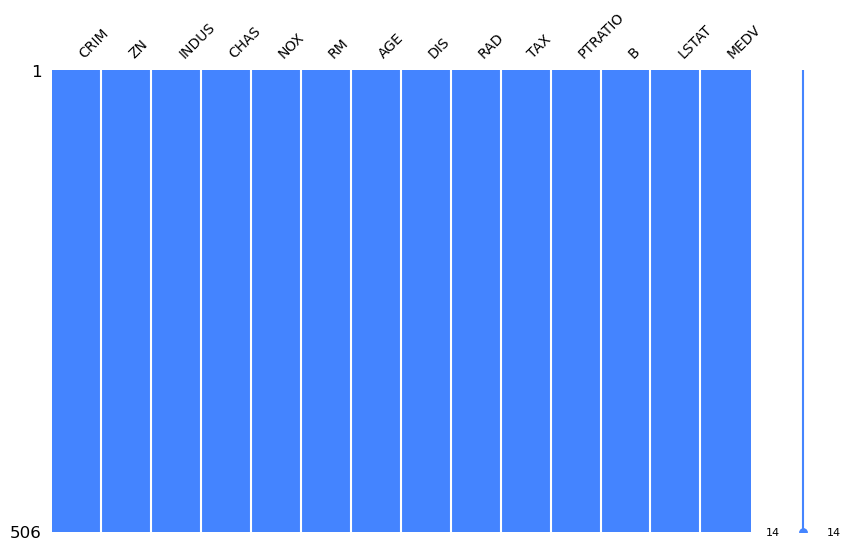

In [8]:
# show missing values and how they are distributed in the dataset. 
msno.matrix(housing_data, color=(0.27, 0.52, 1.0), figsize=(10,6),fontsize=(10))

### 1.3 Verificar datos duplicados

In [9]:
housing_data[housing_data.duplicated()]

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []

<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.      

### 1.4 Descripción estadistica y visualización global de las variables.

El atributo MEDV será el target o variable de predicción. 

Se crearán unos gráficos de dispersión de los atributos en función del atributo MEDV para ver su relación.

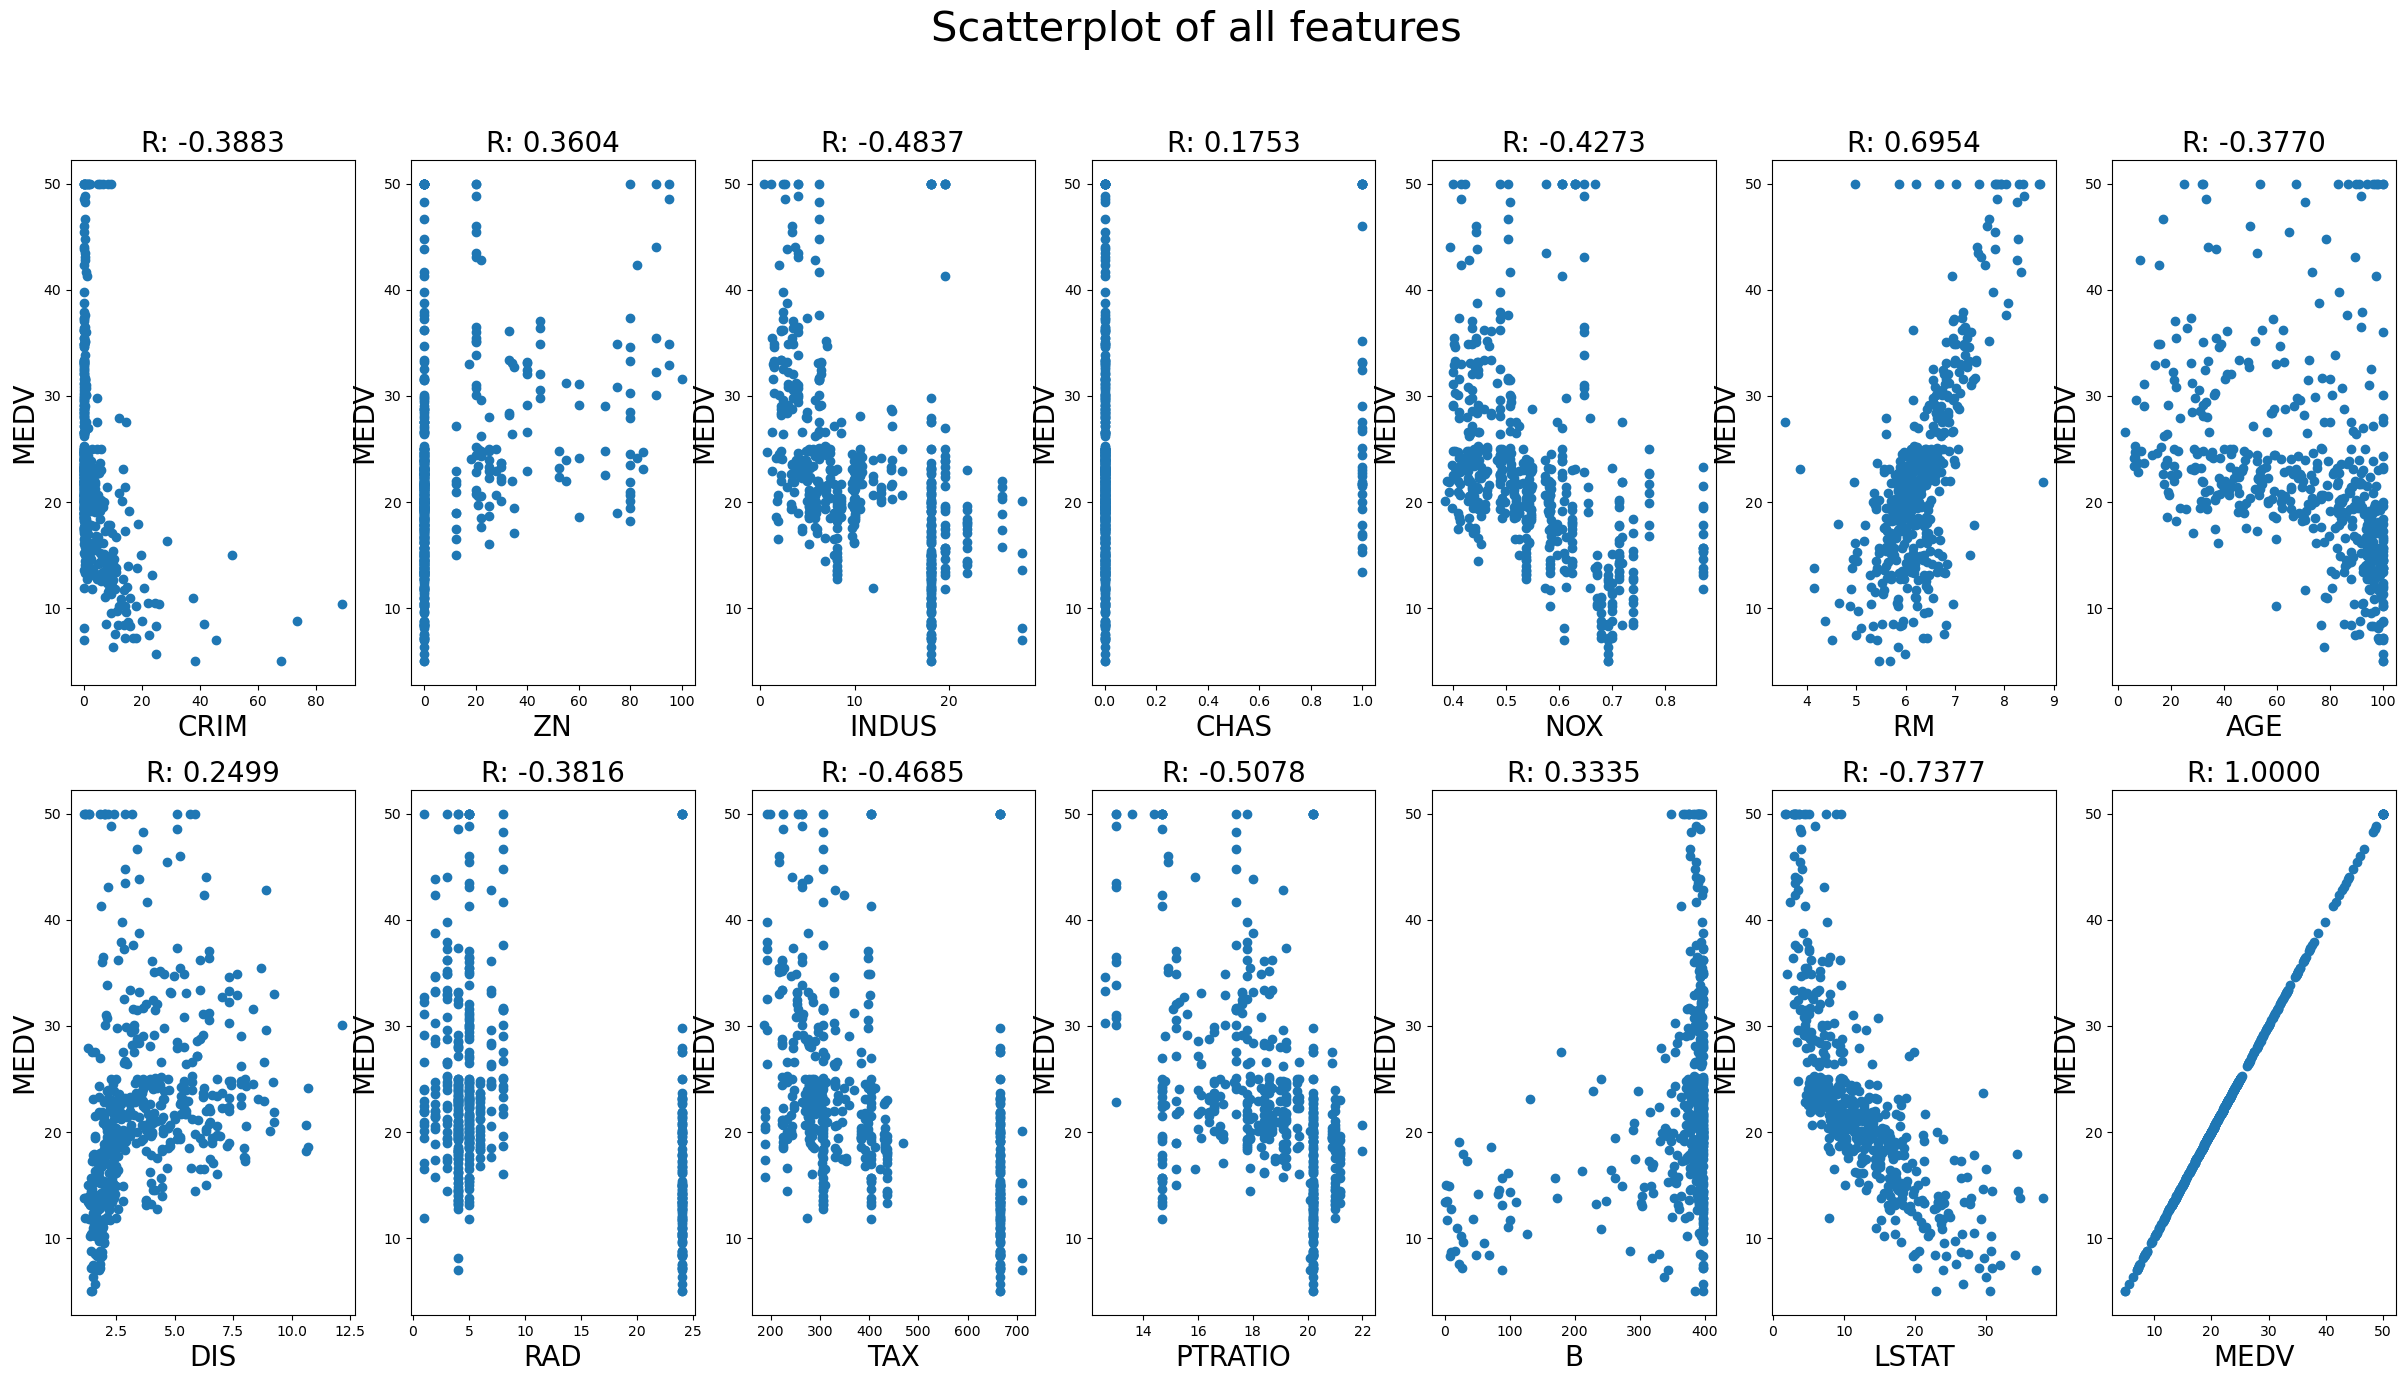

In [10]:
## Column indexer
col_idx = 0

## Create plots with seven columns and two rows
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(30,15))

## Loop through each subplot to make scatterplot 
for i in range(2):
      for j in range(7):
        col = housing_data.iloc[:,col_idx].name
        axes[i, j].plot(housing_data[col], housing_data.MEDV, 'o', color='tab:blue')
        axes[i, j].set_xlabel(housing_data.columns[col_idx], fontsize=20)
        axes[i, j].set_ylabel('MEDV', fontsize=20)
        axes[i, j].set_title('R: {:.4f}'.format(housing_data[['MEDV', col]].corr().iloc[0, 1]), fontsize=20)
        fig.suptitle('Scatterplot of all features', fontsize=30)
        col_idx += 1

* Se observa que muchos atributoss tienen poca correlación con la variable MEDV(Valor medio de las viviendas ocupadas). 
* Los atributos RM y LSTAT, son las que tienen mayor correlación, positiva y negativa respetivamente. 
* Adicionalmente se observa que los atributos  CHAS y RAS tienen valores enteros discretos, el RAD se caracteriza por ser ordinaria categórica, esto significa que estos pueden ser grupos específicos definidos en el conjunto de datos, lo cual se puede ver en el diagrama de dispersión anterior, ya que estas columnas forman líneas rectas verticales.

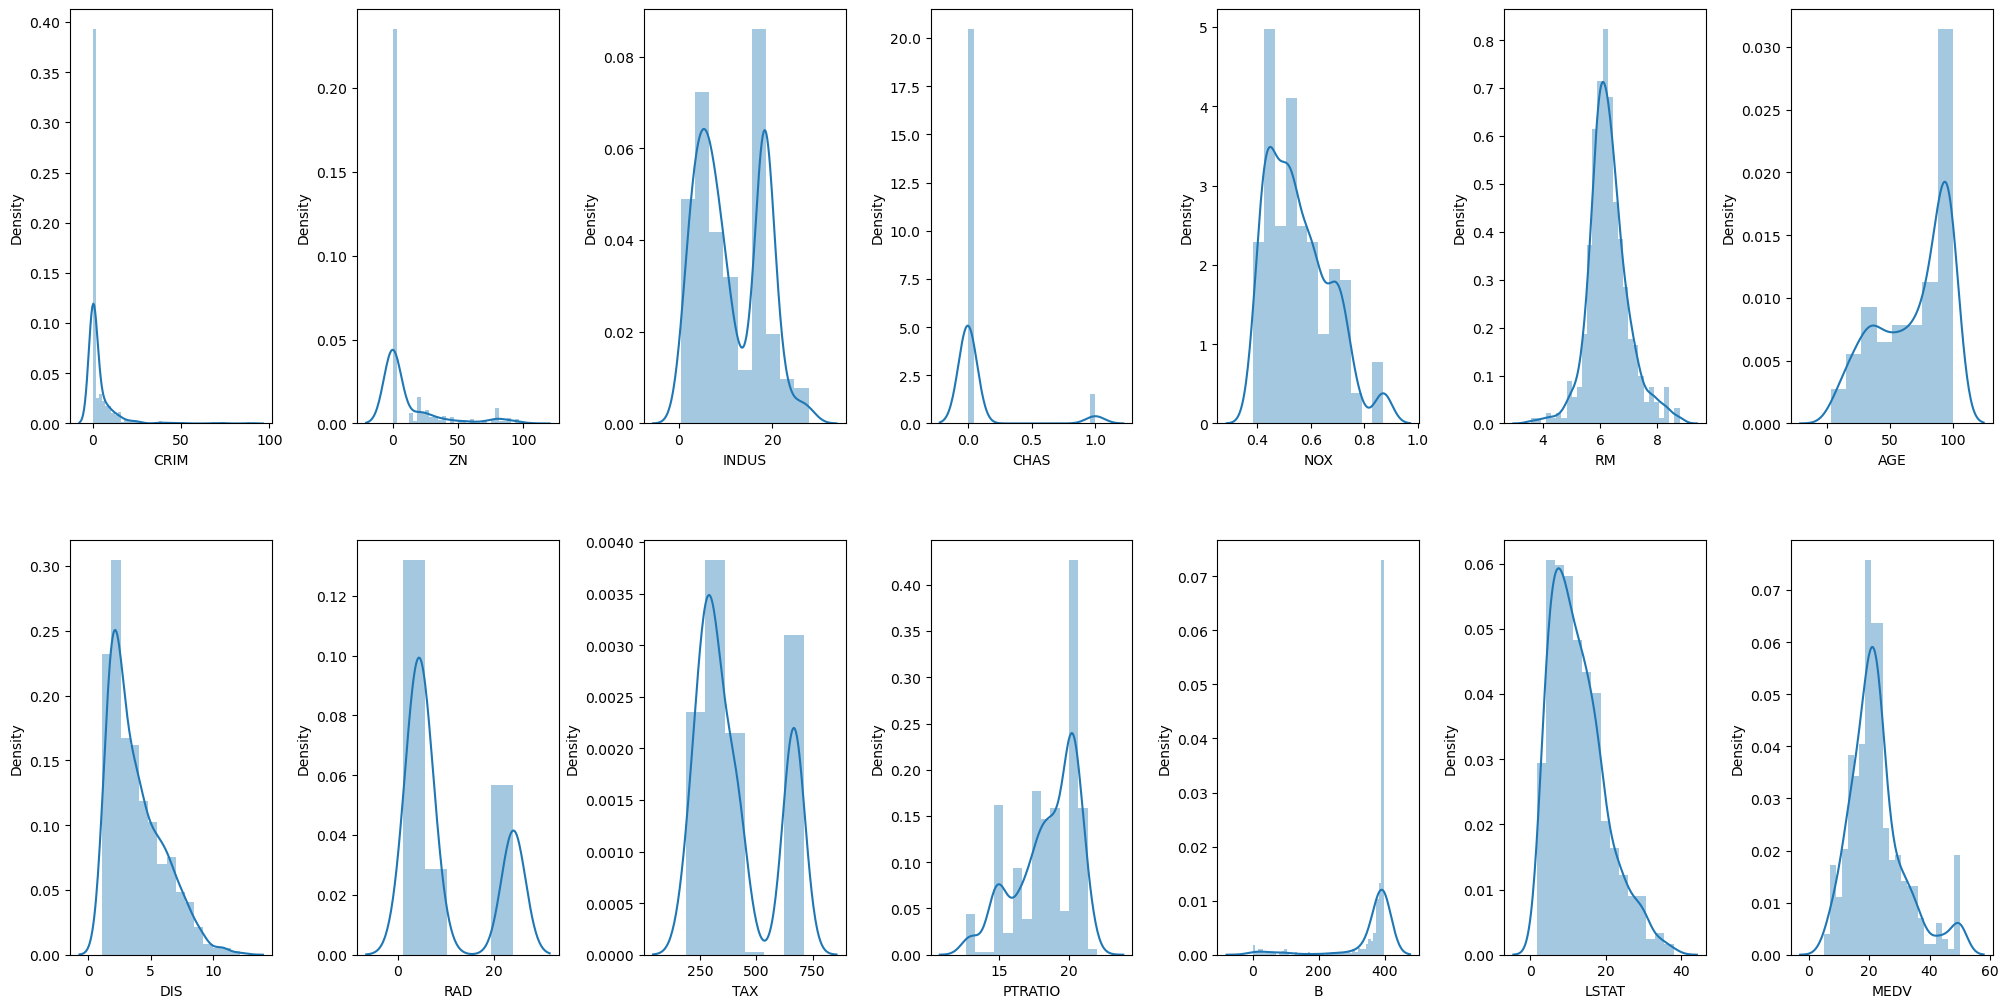

In [11]:
#histogram plots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing_data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

El histograma también muestra que las columnas CRIM, ZN, B tienen distribuciones muy asimétricas, mientras que MEDV parece tener una distribución normal (El target). Adicionalmente se puede observar en los atributos LSTATS, CRIM y DIS alto sesgo hacia la izquierda por lo que se podria evaluar la simetria de las variables.

### Verificar la simetria.

In [12]:
housing_data.agg(['skew','kurtosis']).T

skew   kurtosis
CRIM     5.223149  37.130509
ZN       2.225666   4.031510
INDUS    0.295022  -1.233540
CHAS     3.405904   9.638264
NOX      0.729308  -0.064667
RM       0.403612   1.891500
AGE     -0.598963  -0.967716
DIS      1.011781   0.487941
RAD      1.004815  -0.867232
TAX      0.669956  -1.142408
PTRATIO -0.802325  -0.285091
B       -2.890374   7.226818
LSTAT    0.906460   0.493240
MEDV     1.108098   1.495197

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que la distribución de algunos valores sigue distribuciones sesgadas bimodales o izquierda/derecha. Es posible que se necesite aplicar una transformación.
</div>

### Verificar los valores atípicos.

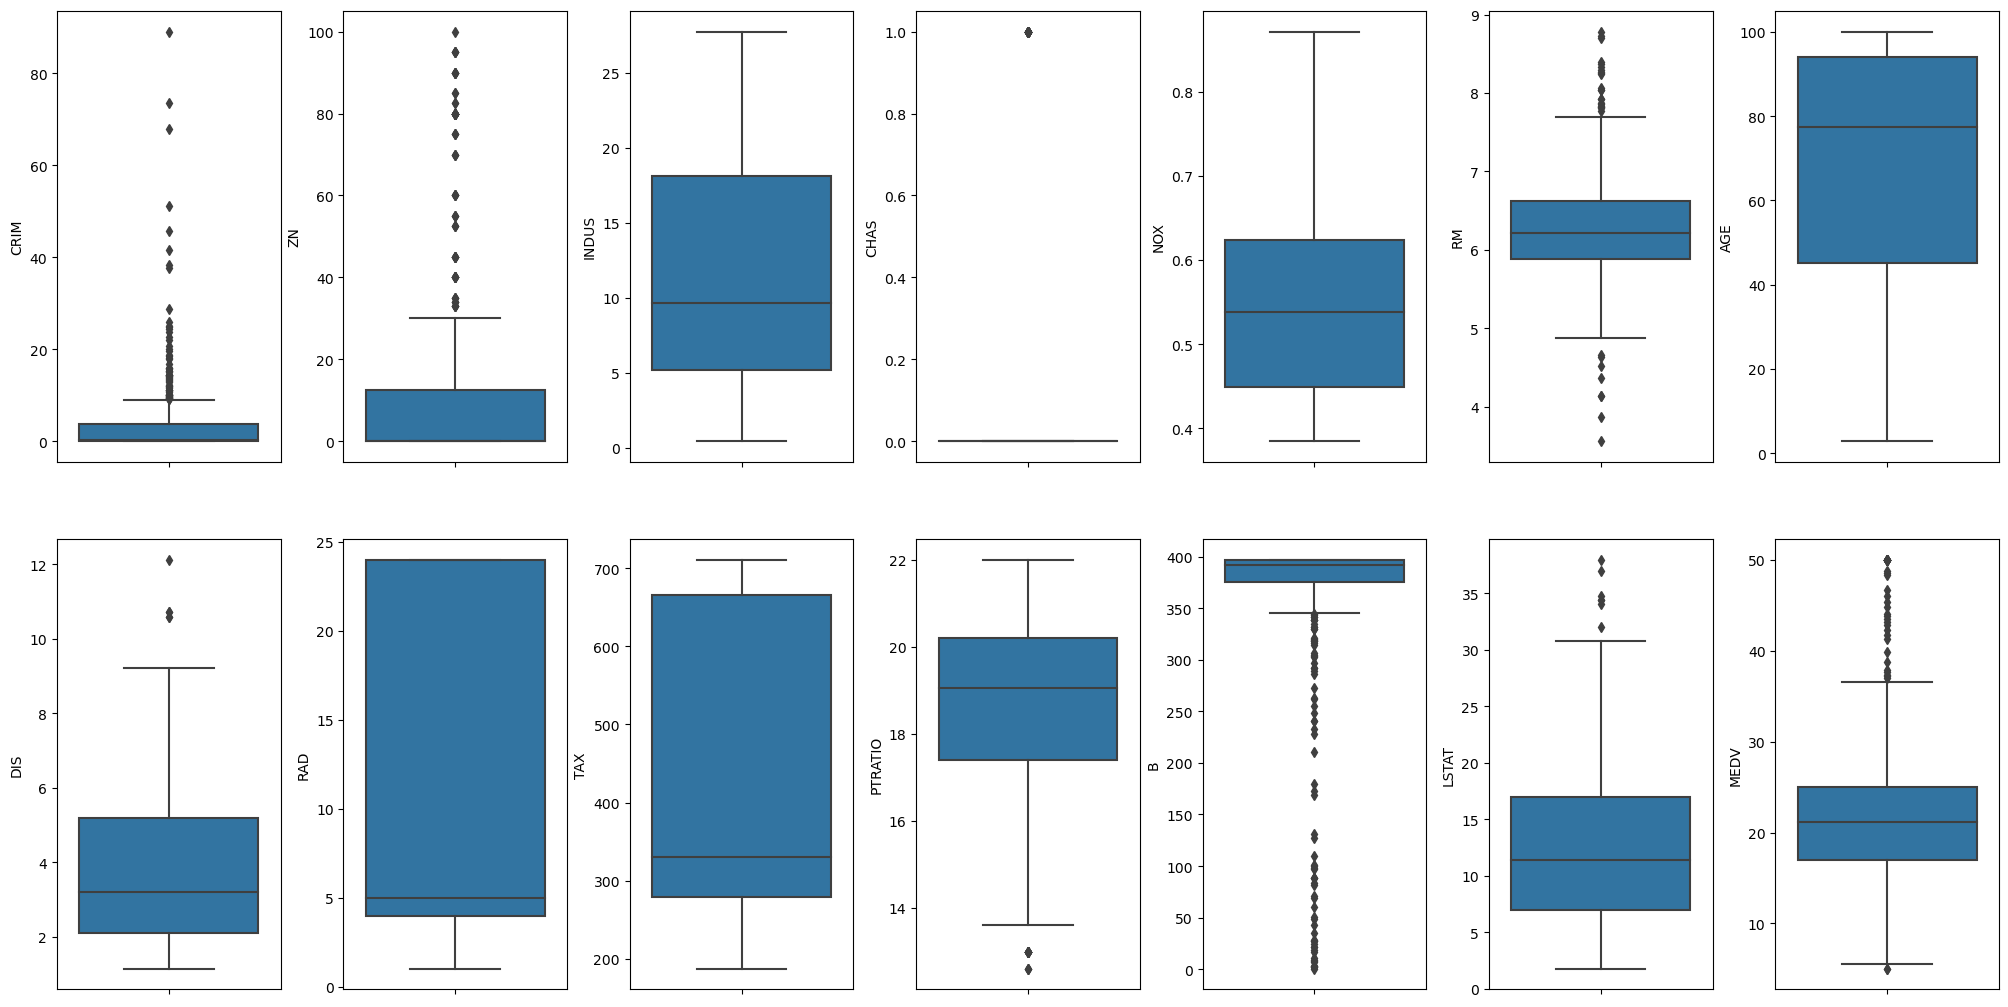

In [13]:
# Se creará un grafico boxplot

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in housing_data.items():
    sns.boxplot(y=k, data=housing_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Se pueden observar que las columnas como CRIM, ZN, RM, B, PTRATIO, LSTAT y MEDV parecen tener altos valores atípicos. Se verificará el % de outliers por atributo o variable.

In [14]:
#% of outliers
for k, v in housing_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(housing_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que los atributos CRIM, ZN, RM, B, PTRATIO, LSTAT y MEDV tienen  valores atípicos, y los % varian entre 1.38% y 15.22%. Se descarta la variable CHAS debido que es una variable categorica. 
</div>

### Análisis de los atributos numéricos (excluyendo CHAS y RAD).

In [15]:
cont_data = housing_data.select_dtypes('float64')
cont_data

CRIM    ZN  INDUS    NOX     RM   AGE     DIS    TAX  PTRATIO       B  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296.0     15.3  396.90   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242.0     17.8  396.90   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242.0     17.8  392.83   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222.0     18.7  394.63   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222.0     18.7  396.90   
..       ...   ...    ...    ...    ...   ...     ...    ...      ...     ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  273.0     21.0  391.99   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  273.0     21.0  396.90   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  273.0     21.0  396.90   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  273.0     21.0  393.45   
505  0.04741   0.0  11.93  0.573  6.030  80.8  2.5050  273.0     21.0  396.90   

     LSTAT  MEDV  
0     4.98  24.0  
1     9.14  21.6  
2     4.03  34.7  
3     2.94  33.4  
4     5.33  36.2  
..     ...   ...  
501   9.67  22.4  
502   9.08  20.6  
503   5.64  23.9  
504   6.48  22.0  
505   7.88  11.9  

[506 rows x 12 columns]

In [17]:
def estadisticos_num(cont_data):
    #Calculamos describe
    estadisticos = cont_data.describe().round(3).T
    #Añadimos la mediana
    estadisticos['median'] = cont_data.median().round(3)
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [18]:
estadisticos_num(cont_data)

count     mean   median      std      min      25%      50%      75%  \
CRIM     506.0    3.614    0.257    8.602    0.006    0.082    0.257    3.677   
ZN       506.0   11.364    0.000   23.322    0.000    0.000    0.000   12.500   
INDUS    506.0   11.137    9.690    6.860    0.460    5.190    9.690   18.100   
NOX      506.0    0.555    0.538    0.116    0.385    0.449    0.538    0.624   
RM       506.0    6.285    6.208    0.703    3.561    5.885    6.208    6.624   
AGE      506.0   68.575   77.500   28.149    2.900   45.025   77.500   94.075   
DIS      506.0    3.795    3.207    2.106    1.130    2.100    3.207    5.188   
TAX      506.0  408.237  330.000  168.537  187.000  279.000  330.000  666.000   
PTRATIO  506.0   18.456   19.050    2.165   12.600   17.400   19.050   20.200   
B        506.0  356.674  391.440   91.295    0.320  375.378  391.440  396.225   
LSTAT    506.0   12.653   11.360    7.141    1.730    6.950   11.360   16.955   
MEDV     506.0   22.533   21.200    9.197    5.000   17.025   21.200   25.000   

             max  
CRIM      88.976  
ZN       100.000  
INDUS     27.740  
NOX        0.871  
RM         8.780  
AGE      100.000  
DIS       12.126  
TAX      711.000  
PTRATIO   22.000  
B        396.900  
LSTAT     37.970  
MEDV      50.000

<h3>Observaciones:</h3>

 *  Se observa que la media y mediana de los precios de las casas son muy cercanas 22.533 y 21.20 respectivamnete.
 *  Se observa que algunas variables como ZN y CRIM poseen una desviación estandar mayor que la media, se puede inferir una mayor dispersión de los datos. 

* **Exploración gráfica de las variables numéricas**

Se observa que algunas variable podrían seguir una distribución normal, con corrrelaciones positivas y negativas.

<Figure size 1200x1200 with 0 Axes>

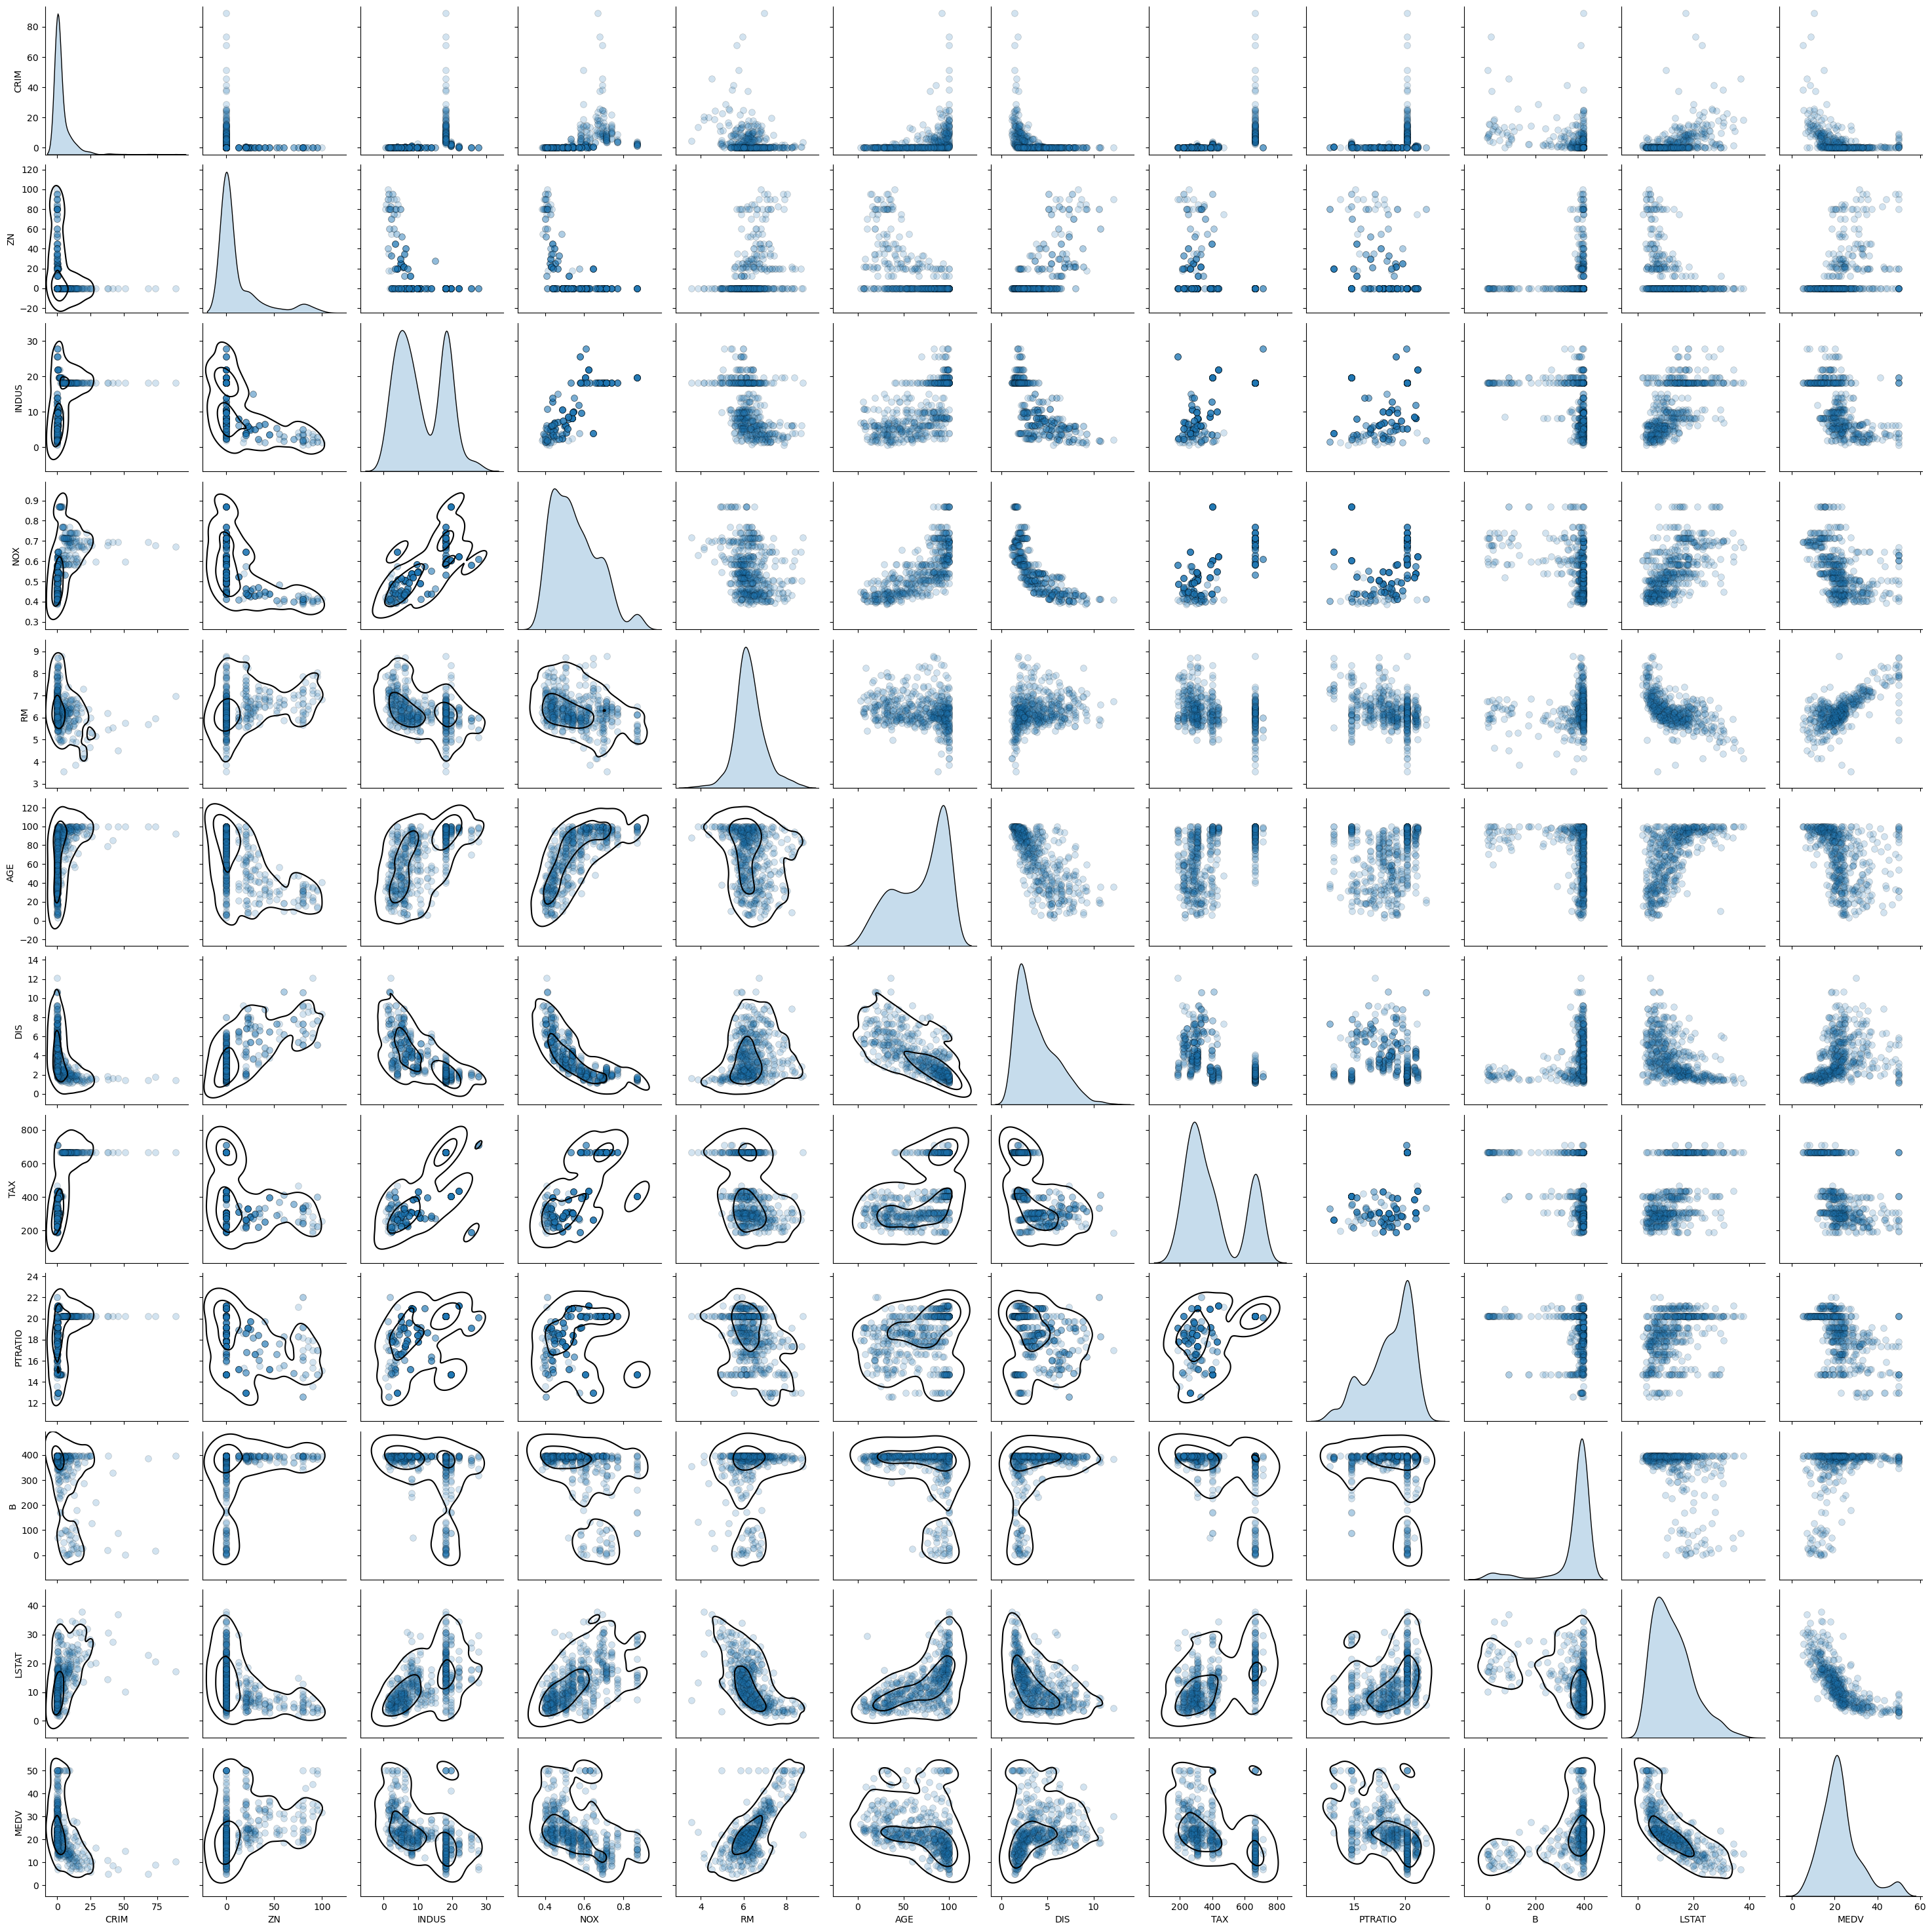

In [19]:
# pairplots on cont_data
plt.figure(figsize=(12, 12))

dpalette = sns.color_palette("winter",n_colors = 3)   # matrix scatter plot with points and density estimator
palette = sns.color_palette("winter")

matrixplot = sns.pairplot(cont_data, diag_kind = 'kde', palette = dpalette, diag_kws={'edgecolor':'black'},
                          plot_kws=dict(s=50, edgecolor="black", linewidth=0.5,alpha=0.2))
matrixplot.map_lower(sns.kdeplot, levels=3, color="black")

plt.show()

Los gráficos de pairplot se puede ver correlación entre algunas de las variables, sin embargo solo los atributos RM y LSTAT, son las que tienen mejor correlación, positiva y negativa respetivamente con el atributo target (MEDV)

En la diagonal se puede ver la distribución de cada variable, vemos que algunas variables como ZM y CRIM tienen distribucción asimétrica a la la derecha y B tiene distribuciones asimétricas a la izquierada, esto puede deberse a la presencia de valores atípicos.

Algunas de las variables independientes parecen estar altamente correlacionadas entre sí, tal se tengan que realizar algun estudio adicional de multicolinealidad de las variables. Se trazará un mapa de calor para chequear la correlación entre las variables:

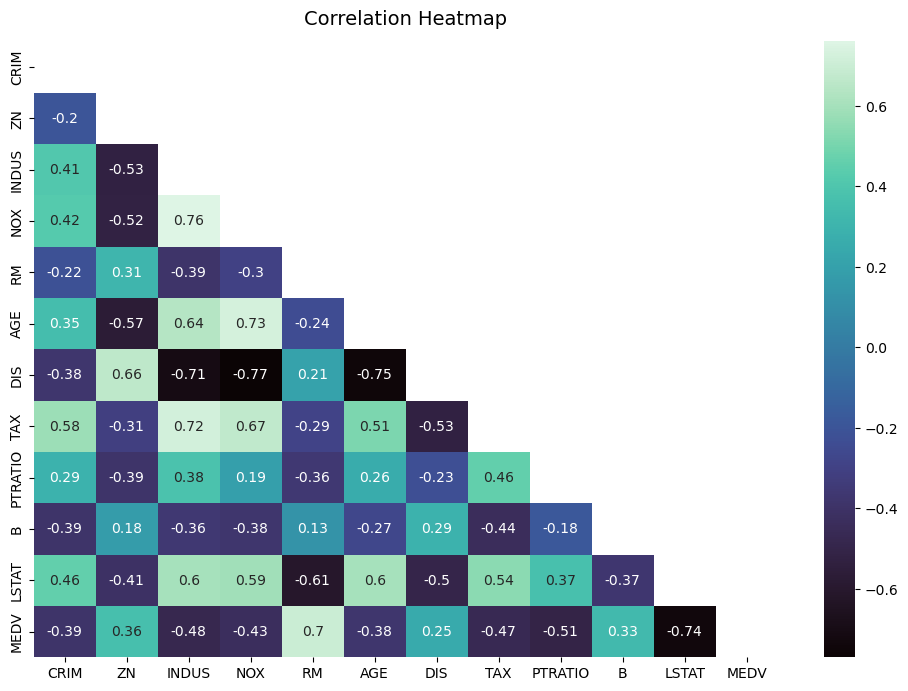

In [20]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))

housing_corr_num = housing_data.drop(['CHAS','RAD'], axis=1)

mask = np.triu(np.ones_like(housing_corr_num.corr().round(2))) 

ax= sns.heatmap(housing_corr_num.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que algunos atributos en el conjunto de datos están tan fuertemente correlacionados postivamente o negativamente, sin embargo solo los atributos RM y LSTAT, son las que tienen mejor correlación, positiva y negativa respetivamente con el atributo target (MEDV). Se infiere que la mayoria de las variables no distribuyen normalmente.
</div>

### Análisis de los atributos categóricos.

Ahora se analizará las variables categóricas, en esta sección se incluye los atributos "CHAS" y "RAD".

In [21]:
cols = ['CHAS', 'RAD']

for i in cols: 
    housing_data[i] = housing_data[i].astype('category')
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [22]:
cat = housing_data.select_dtypes('category')
cat

CHAS RAD
0      0   1
1      0   2
2      0   2
3      0   3
4      0   3
..   ...  ..
501    0   1
502    0   1
503    0   1
504    0   1
505    0   1

[506 rows x 2 columns]

<h3>Observaciones:</h3>

   * En este resúmen se puede identificar rápidamente los valores más frecuentes de cada característica y el número de veces que aparecen. 
   * El atributo "CHAS" tiene dos valores unico, siendo el de mayor frecuencia el numero 0. 
   * El atributo "RAD" tiene 9 valores y los que mas se repiten son los numero 4, 5 y 24.

* **Exploración gráfica de las variables categoricas**

In [23]:
def graficos_eda_categoricos(df_cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

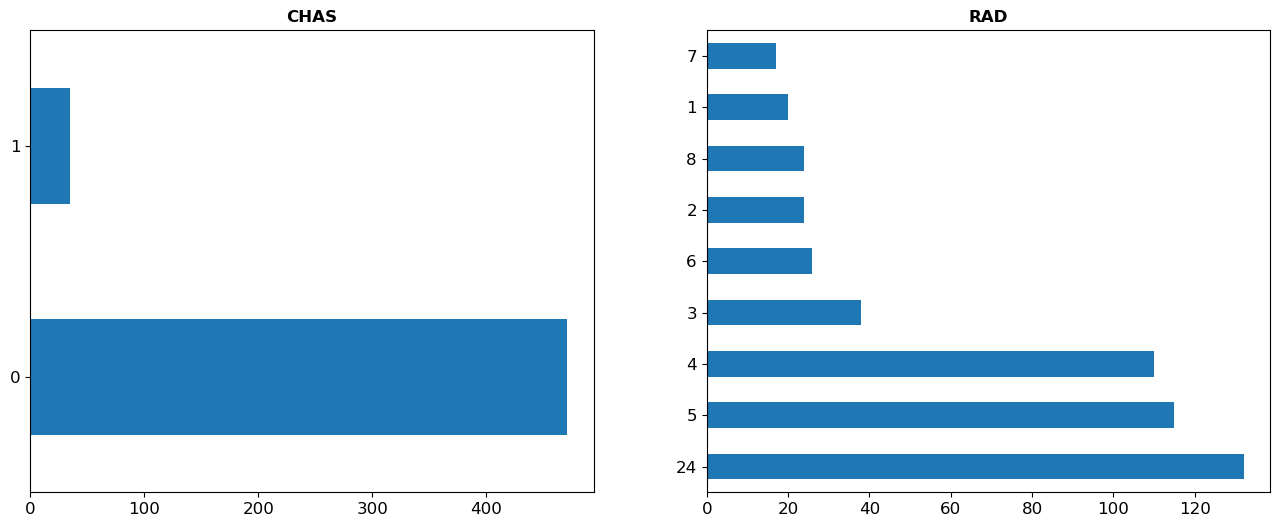

In [24]:
graficos_eda_categoricos(cat)

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que en el atributo "CHAS" la mayor frecuencia es que las casas no limitan con el rio, mientras que en el  atributo "RAD" los radios para el acceso a las autopista que más frecuentes se encuentran las casas son de 4,5 y 24.
</div>

### Aplicación de prueba de hipotesis para chequear distribución normal

Se comprobará si las variables siguen la misma distribución normal (forman una gausiana), a traves de un Test de Shapiro.

In [25]:
def check_normal_distribution(data):
    for i in data.columns:
        shapiro_test = stats.shapiro(data[i])
        print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
        if shapiro_test.pvalue>0.05:
            print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
        else:
            print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')


In [26]:
check_normal_distribution(housing_data)

La variable CRIM tiene un p-value=  1.3285678005931464e-36
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable ZN tiene un p-value=  7.882576753156324e-34
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable INDUS tiene un p-value=  1.0642289039786765e-17
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable CHAS tiene un p-value=  2.350467979135232e-40
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable NOX tiene un p-value=  5.775851259944009e-14
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable RM tiene un p-value=  2.41115960530891e-10
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

La variable AGE tiene un 

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que las muestras no tienes una distribución normal (Probablemente no Gaussiana).
</div>

### 1.6 Pre-procesamiento

*  Dado que las variables numéricas independientes no tienen distribucción normal o gausiona se le aplicaran normalización:
    * Outliers:**'CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'**, **'RAD'** se le aplicará **RobustScaler**.
    * No outliers: **'INDUS', 'NOX', 'TAX', 'AGE'** se le aplicará **MinMaxScaler**.
* La variable "CHAS" al ser un dummie, está lista para un entrenamiento de Machine learning por lo que no se realizará ninguna transformación.

* **Transformación al dataset**

In [27]:
hdata_transf = housing_data.copy()

* **Transformación de las variables independientes**

In [28]:
#MinMaxScaler for variables without outliers
minmax_col = ['INDUS', 'NOX', 'TAX', 'AGE']
trans = MinMaxScaler()
hdata_transf[minmax_col] = trans.fit_transform(hdata_transf[minmax_col])
hdata_transf.head()

CRIM    ZN     INDUS CHAS       NOX     RM       AGE     DIS RAD  \
0  0.00632  18.0  0.067815    0  0.314815  6.575  0.641607  4.0900   1   
1  0.02731   0.0  0.242302    0  0.172840  6.421  0.782698  4.9671   2   
2  0.02729   0.0  0.242302    0  0.172840  7.185  0.599382  4.9671   2   
3  0.03237   0.0  0.063050    0  0.150206  6.998  0.441813  6.0622   3   
4  0.06905   0.0  0.063050    0  0.150206  7.147  0.528321  6.0622   3   

        TAX  PTRATIO       B  LSTAT  MEDV  
0  0.208015     15.3  396.90   4.98  24.0  
1  0.104962     17.8  396.90   9.14  21.6  
2  0.104962     17.8  392.83   4.03  34.7  
3  0.066794     18.7  394.63   2.94  33.4  
4  0.066794     18.7  396.90   5.33  36.2

In [29]:
#RobustScaler for variables with outliers
robust_col = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'RAD']
Robust_scaler = preprocessing.RobustScaler().fit(hdata_transf[robust_col])
hdata_transf[robust_col] = Robust_scaler.transform(hdata_transf[robust_col])


hdata_transf.head()

CRIM    ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815    0  0.314815  0.496612  0.641607  0.285777   
1 -0.063755  0.00  0.242302    0  0.172840  0.287940  0.782698  0.569789   
2 -0.063760  0.00  0.242302    0  0.172840  1.323171  0.599382  0.569789   
3 -0.062347  0.00  0.063050    0  0.150206  1.069783  0.441813  0.924391   
4 -0.052144  0.00  0.063050    0  0.150206  1.271680  0.528321  0.924391   

    RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0 -0.20  0.208015 -1.339286  0.261902 -0.637681  24.0  
1 -0.15  0.104962 -0.446429  0.261902 -0.221889  21.6  
2 -0.15  0.104962 -0.446429  0.066675 -0.732634  34.7  
3 -0.10  0.066794 -0.125000  0.153016 -0.841579  33.4  
4 -0.10  0.066794 -0.125000  0.261902 -0.602699  36.2

* Chequear los tipos de variables, para verificar que esten en un mismo tipo de variables.

In [30]:
hdata_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


Se transformara la variables CHAS a numerica.

In [31]:
hdata_transf['CHAS'] = pd.to_numeric(hdata_transf['CHAS'], errors='coerce')

* **Visualización despues del preprocesado**

Se realiza un grafico de histograma y de cajas, para ver las mejores en los atributos, una vez aplicado trasformación.

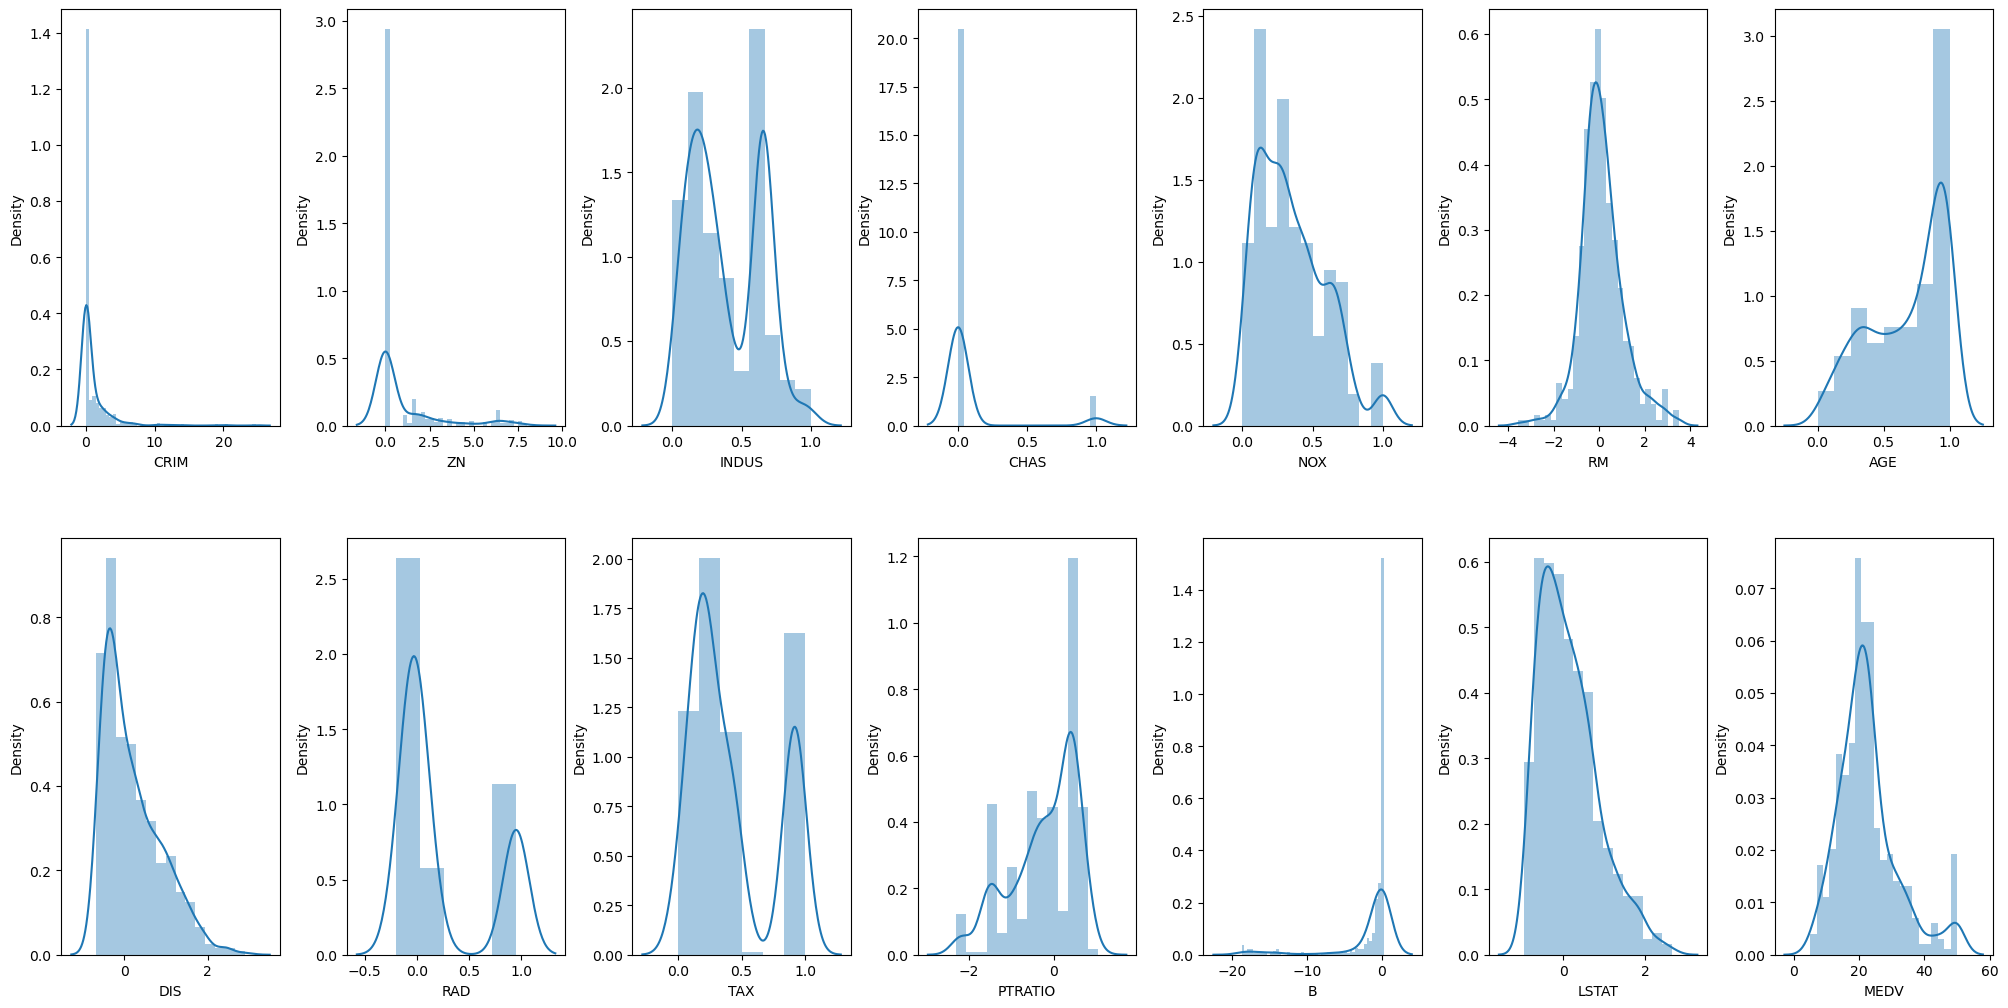

In [33]:
#histogram plots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in hdata_transf.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

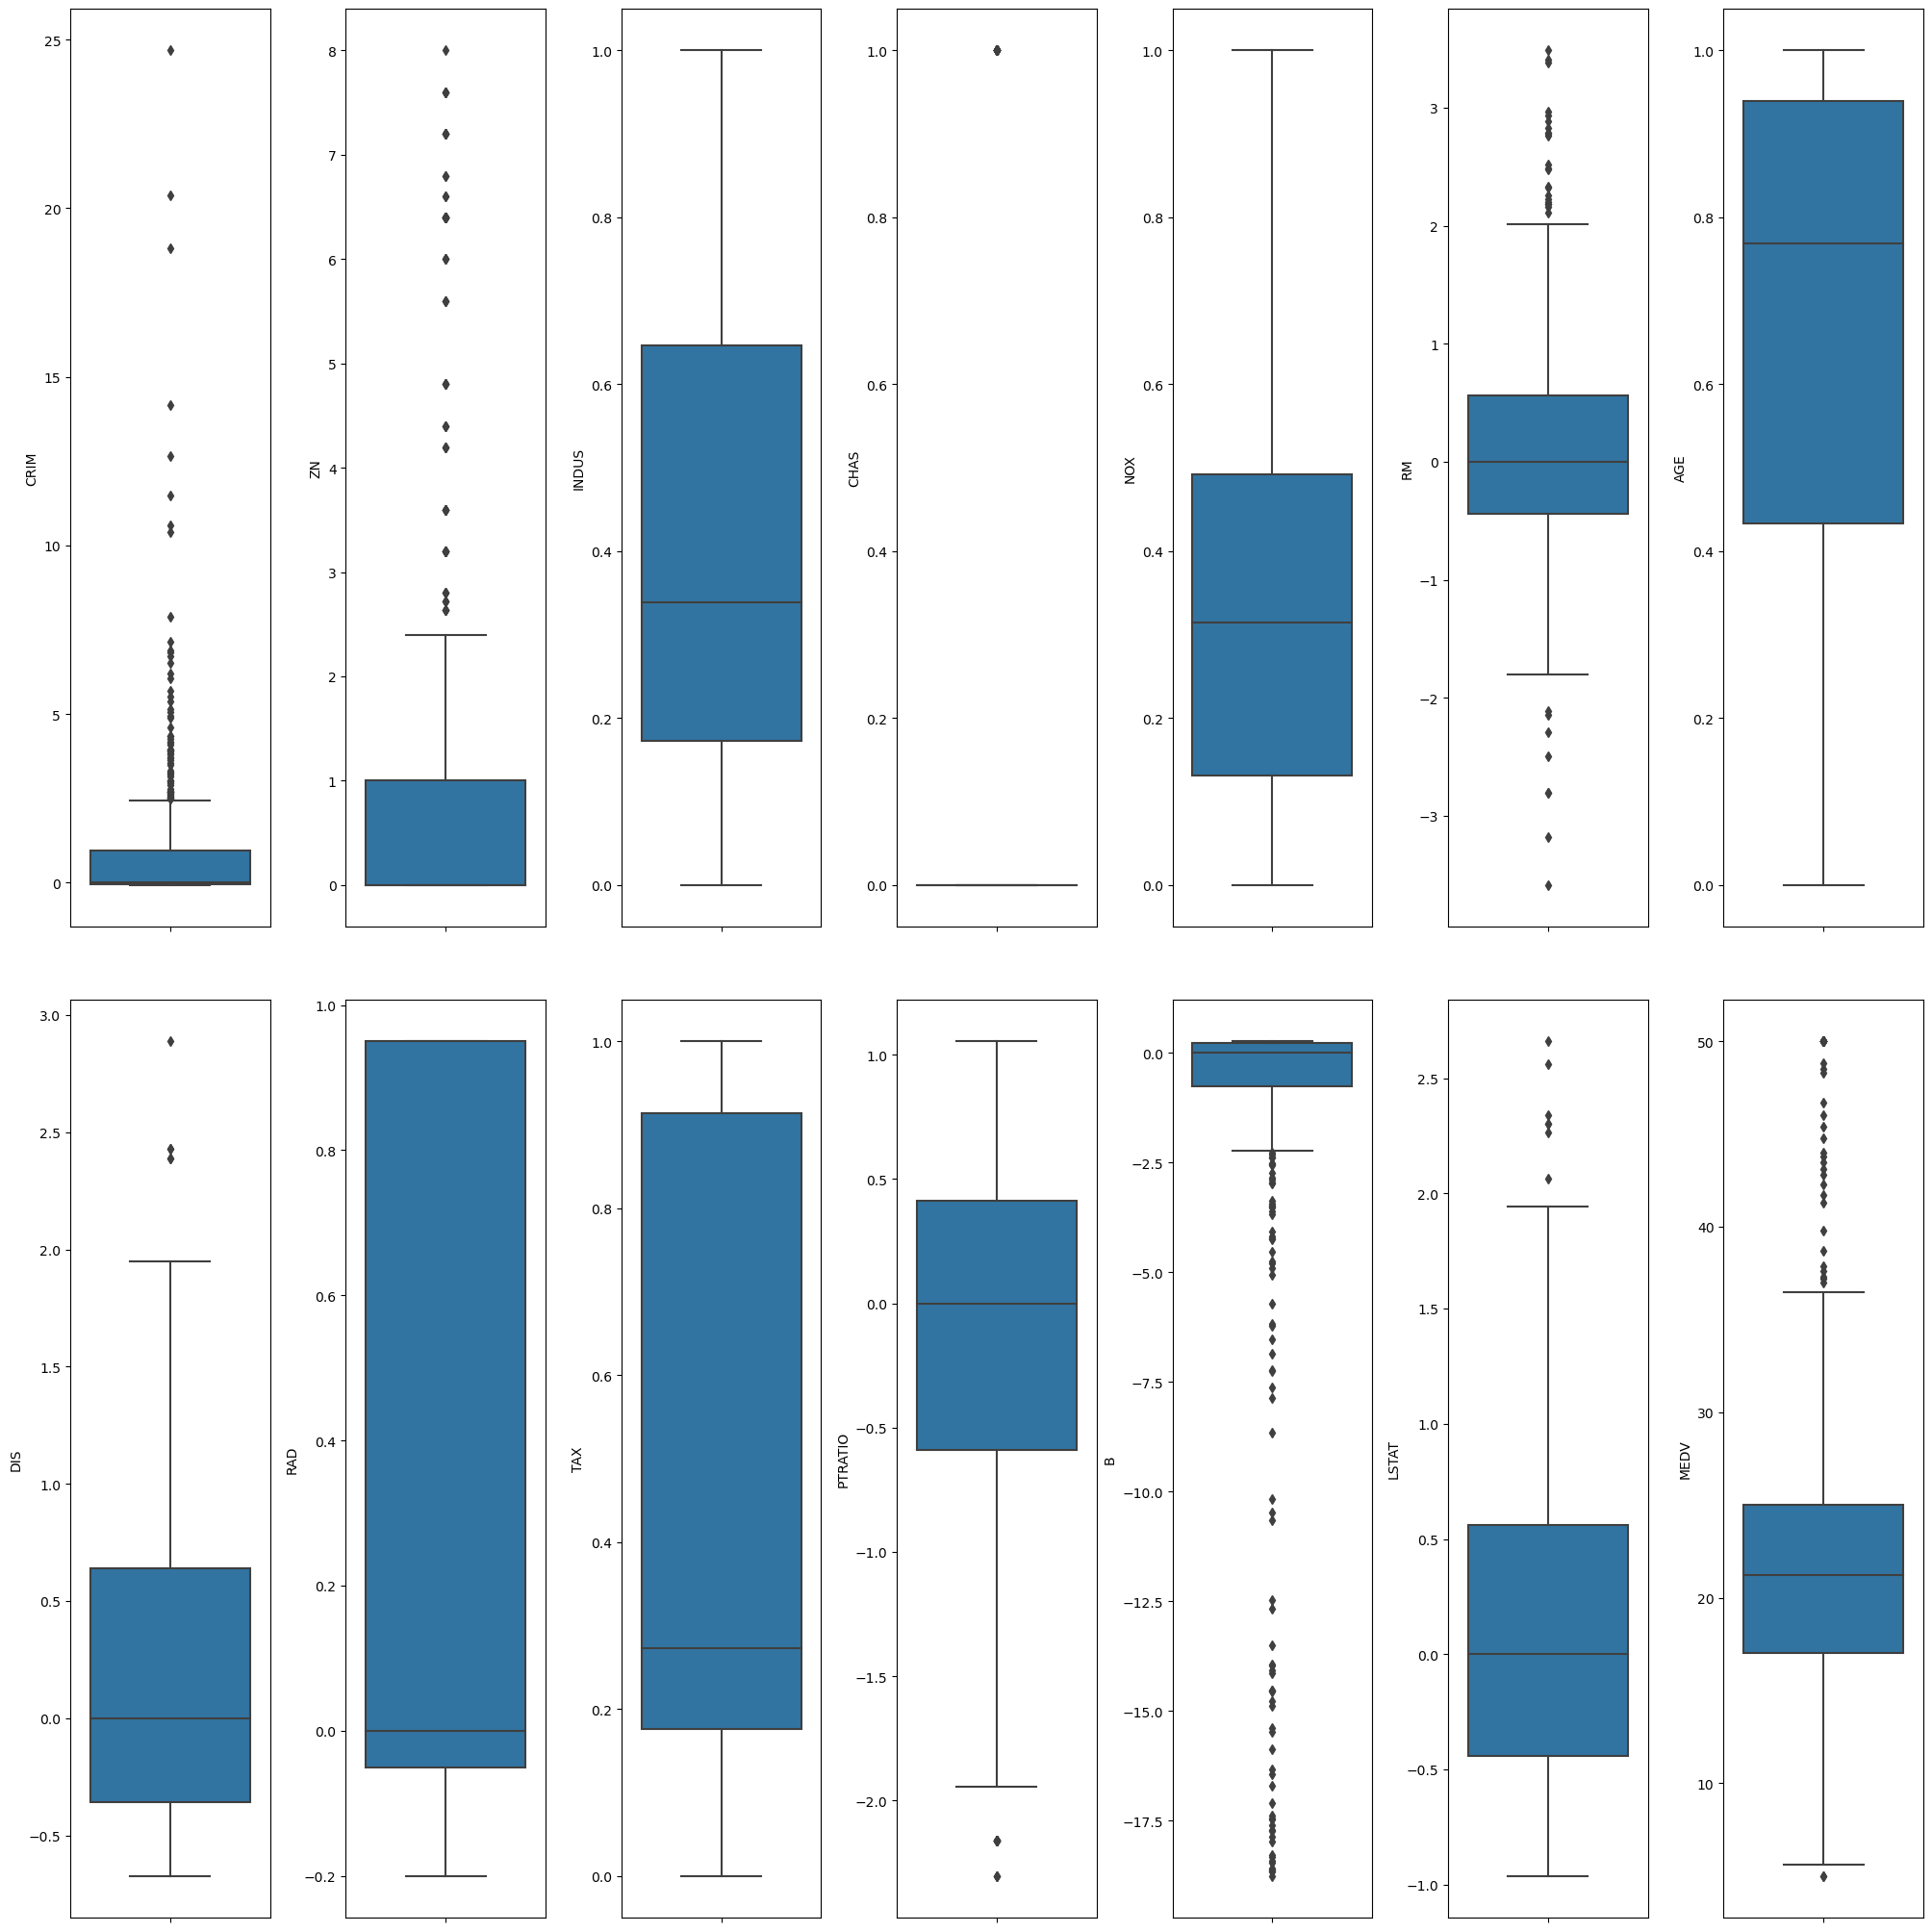

In [34]:
# boxplot x data
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in  hdata_transf.items():
    sns.boxplot(y=k, data= hdata_transf, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Aunque se aplicó transformación robuscale para mejorar los outliers, en las variables "CRIN", "ZN", "RM", "B", 'RAD' no hubo una mejora significativa, mantiene altos valores tomando en cuenta que son datos escalados, por lo que es probable que pueda afectar los modelos de regresión. Posiblemente requiera otro tipo de trasformación o aplicar imputación por outliers.

### 1.7 Definir target y features

In [35]:
x = hdata_transf.drop(columns = 'MEDV')
y = hdata_transf['MEDV']

In [36]:
x.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1 -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2 -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3 -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4 -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   

    RAD       TAX   PTRATIO         B     LSTAT  
0 -0.20  0.208015 -1.339286  0.261902 -0.637681  
1 -0.15  0.104962 -0.446429  0.261902 -0.221889  
2 -0.15  0.104962 -0.446429  0.066675 -0.732634  
3 -0.10  0.066794 -0.125000  0.153016 -0.841579  
4 -0.10  0.066794 -0.125000  0.261902 -0.602699

In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB


In [38]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 1.8 Split del dataset: Train y Test data

Para realizar la división del Dataset: Training y Test (Train Test Split), se utilizará 80% para el Train y 20% para el Test.

In [39]:
from sklearn.model_selection import train_test_split

In [94]:
#Dividir los datos de entrenamiento y test
#random_state=4
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4, train_size=0.75)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [95]:
# Dividir los datos de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=4, train_size=0.70)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(265, 13) (114, 13) (265,) (114,)


<div class="alert alert-block alert-info">
<b>Ejercicio 1:</b> Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.
</div>

In [51]:
# import modules for Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import svm

# import modules for the metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

**Modelo N°1: REGRESIÓN LINEAL MÚLTIPLE**

* **Entrenar el modelo**

In [96]:
#Instanciar
rm = LinearRegression()

#Entrenar
rm.fit(x_train,y_train)

LinearRegression()

* **Evaluar el modelo en el conjunto de validación y test**

In [97]:
# Evaluar el modelo de regresión lineal en el conjunto de validación
val_acc = rm.score(x_val, y_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.7057201345818295


In [98]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = rm.score(x_test, y_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.7396796046976325


El puntaje del modelo r2 es menor en los datos de validación con respecto al test. Se puede observar que la diferencia es de 0.034, se verificará si existe algun sobre ajuste aplicando una regularización. 

* **Predecir el modelo**

In [110]:
# Model prediction on test data
y_pred_rm_val = rm.predict(x_val)

In [111]:
# Model prediction on test data
y_pred_rm = rm.predict(x_test)

In [112]:
# los 10 primeros valores de MEDV (y_pred)
y_pred_rm[:10]

array([12.00286456, 26.79328131, 17.53692045, 17.05148973, 36.91721442,
       25.42372296, 31.33939181, 19.8612222 , 19.89172711, 21.86481269])

In [113]:
prediccion = pd.DataFrame(y_pred_rm, columns = ['PREDICCION'])
prediccion.head()

PREDICCION
0   12.002865
1   26.793281
2   17.536920
3   17.051490
4   36.917214

* **Revisión de los parámetros de entrenamiento**

In [102]:
rm.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [103]:
rm.intercept_

27.689822293790048

* **Evaluar el modelo**

Para evaluar cada modelo se calculará:
* El R2 que es una medida de la relación lineal entre X e Y, se interpreta como la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente. 
* El MSE es una medida que indica qué tan cerca está la regresión de los puntos observados. Cuanto menor sea el MSE, mejor será el pronóstico.

In [104]:
def evaluacion(data, predicted): 
    
    r2_square = metrics.r2_score(data, predicted)
    mse = metrics.mean_squared_error(data, predicted)
    errors = mean_absolute_error(data, predicted)
    
    print('R2 : ', r2_square)
    print('MSE (Error cuadrático medio) : ', mse)
    print('MAE (Error Absoluto Medio) : ',  errors)

In [105]:
# Model Evaluation on test data
evaluacion(y_test, y_pred_rm)

R2 :  0.7396796046976325
MSE (Error cuadrático medio) :  26.118862813818957
MAE (Error Absoluto Medio) :  3.478967125630558


* **Visualización de la predicción**

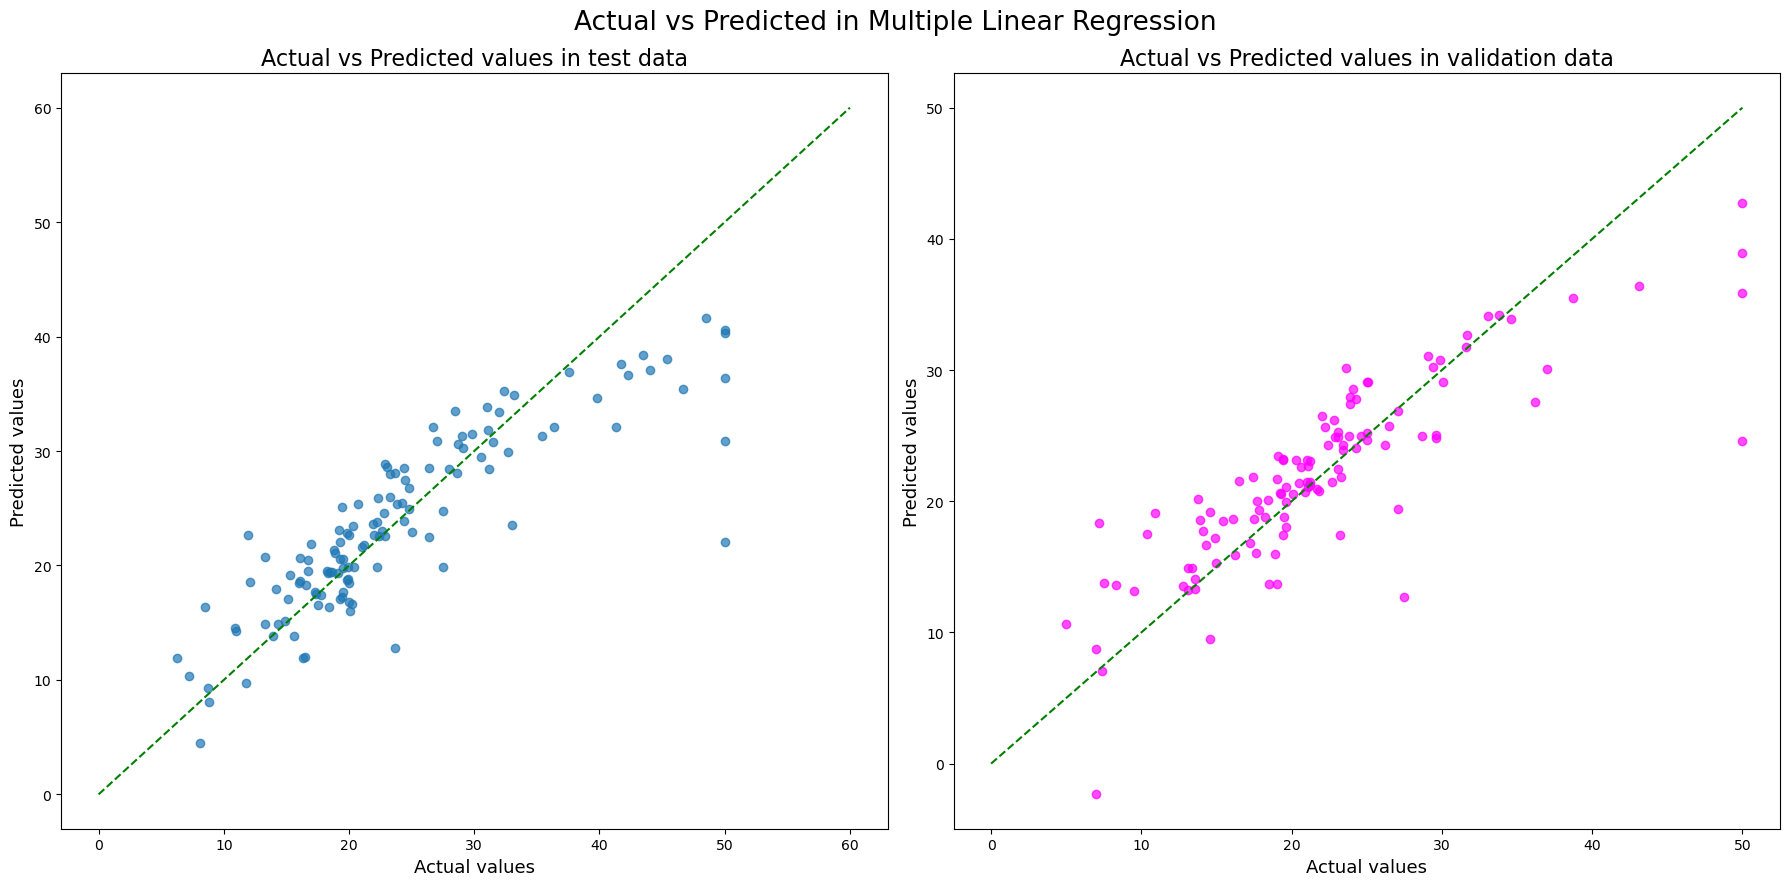

In [115]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_test, y= y_pred_rm , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_val, y = y_pred_rm_val, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in validation data', fontsize = 16)
plt.tight_layout(); 

En los graficos de dispersión se observan valores atipicos o outliers, una mayor dispersion en los valores del test, lo cual puede estar afectando a los resultados en R2. Al dibujar una línea de 45°, cuanto más cerca esté el diagrama de dispersión de esa línea, mejores serán las predicciones de dispersión,  lo cual se puede observar los valores muy dispersos y algunos puntos alejados de la linea recta.

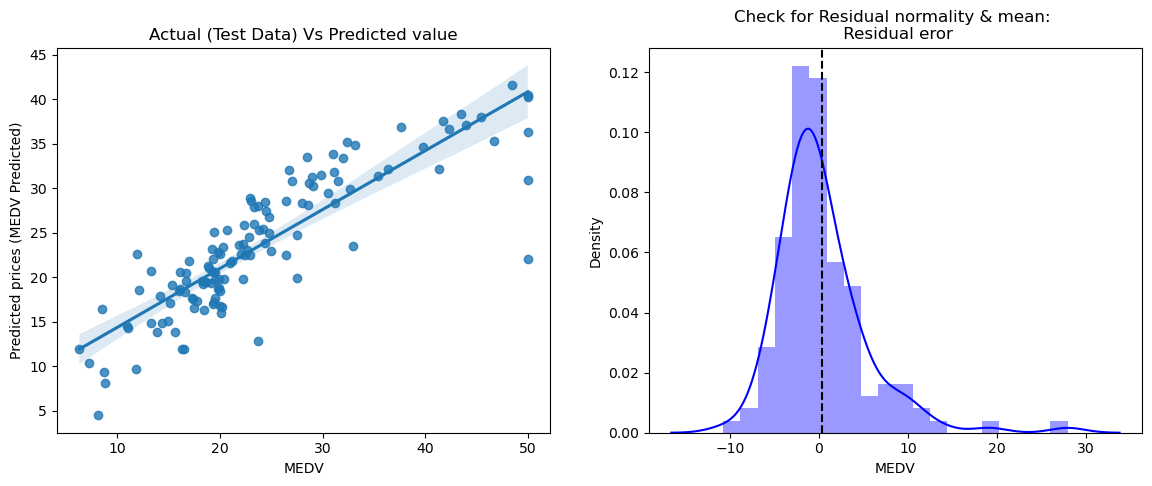

In [116]:
# Plotting Actual observations vs predicted observations Test Data
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=y_pred_rm, x=y_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_test - y_pred_rm)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

* En el diagrama de dispersión se puede observar que la línea diagonal no es tan recta, lo que representa las diferencias en las predicciones reales y las predictivas. 
* Los errores se centran alrededor de 0 pero están un poco sesgados a la izquierda.

**Modelo N°2: Ridge Regression**

En vista que en la regresion lineal multimple el r2 del test es menor que el train, se aplicará una regularización de Ridge porque quizas los valores de R2 diferentes, se puede inferir un overfitting o una multicolinealidad de las variables independientes entre si, previo a esto se aplicará VIF para chequear la suposición. 

* **Chequear la multicolinealidad de las variables independientes**.

Se realizará un estudio de la multicolinealidad de las variables independientes, se utilizará el modelo Un factor de inflación de varianza (VIF), la cual es una medida de la cantidad de multicolinealidad en el análisis de regresión. VIF se utiliza para identificar la correlación de una variable independiente con un grupo de otras variables.

In [117]:
VF_eval=housing_data.copy()

In [118]:
# import module to evaluate multicollinearity from the independent variables set
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we ´ll define a function that loops across al features and show their multicollinearity
def calculate_vif(df, cols): 
    variables = df[cols]
    vif = pd.DataFrame()
    
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['features'] = variables.columns
    return vif

In [119]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [120]:
calculate_vif(VF_eval, cols)

VIF features
0    2.100373     CRIM
1    2.844013       ZN
2   14.485758    INDUS
3    1.152952     CHAS
4   73.894947      NOX
5   77.948283       RM
6   21.386850      AGE
7   14.699652      DIS
8   15.167725      RAD
9   61.227274      TAX
10  85.029547  PTRATIO
11  20.104943        B
12  11.102025    LSTAT

Como se observa se tienen algunos valores VIF muy grandes, mayores a 10, confirmando la multicolinealidad entre las varaibles dependientes. En este sentido se aplicará el modelo Ridge debido que trabaja con este tipo de casos.

* **Entrenar el modelo**

In [121]:
#Instanciar
ridge = Ridge()

#Entrenar
ridge.fit(x_train,y_train)

Ridge()

* **Evaluar el modelo en el conjunto de validación y test**

In [122]:
# Evaluar el modelo de regresión lineal en el conjunto de validación
val_acc = ridge.score(x_val, y_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.6987370669451186


In [123]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = ridge.score(x_test, y_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.7386590383556064


El puntaje del modelo r2 es menor en los datos de validación con respecto al test. Se puede observar que la diferencia es de 0.034. 

* **Predecir el modelo**

In [124]:
# Model prediction on train data
y_pred_rid_val = ridge.predict(x_val)

In [125]:
# Model prediction on test data
y_pred_rid = ridge.predict(x_test)

In [126]:
# los 10 primeros valores de MEDV (y_pred)
y_pred_rid[:10]

array([11.98767963, 26.47071097, 17.68676727, 16.65539708, 36.70324971,
       25.24696775, 31.02207651, 19.6232871 , 19.63901703, 22.52450383])

In [127]:
prediccion = pd.DataFrame(y_pred_rid, columns = ['PREDICCION'])
prediccion.head()

PREDICCION
0   11.987680
1   26.470711
2   17.686767
3   16.655397
4   36.703250

* **Revisión de los parámetros de entrenamiento**

In [128]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

* **Evaluar el modelo**

In [129]:
# Model Evaluation on test data
evaluacion(y_test, y_pred_rid)

R2 :  0.7386590383556064
MSE (Error cuadrático medio) :  26.221259832111812
MAE (Error Absoluto Medio) :  3.419286245469659


Se obtuvo el mismo puntaje r2 que en el modelo de regresion lineal multiple, probablemente no exista overfitting, quizas existan alguna cantidad excesiva de Dimensiones (features), sin suficientes muestras o los altos valores de outliers que aun presentan este afectando los resultados. Sin embargo se continuará evaluando otros modelos para verificar si exisa alguna mejora. 

* **Visualización de la predicción**

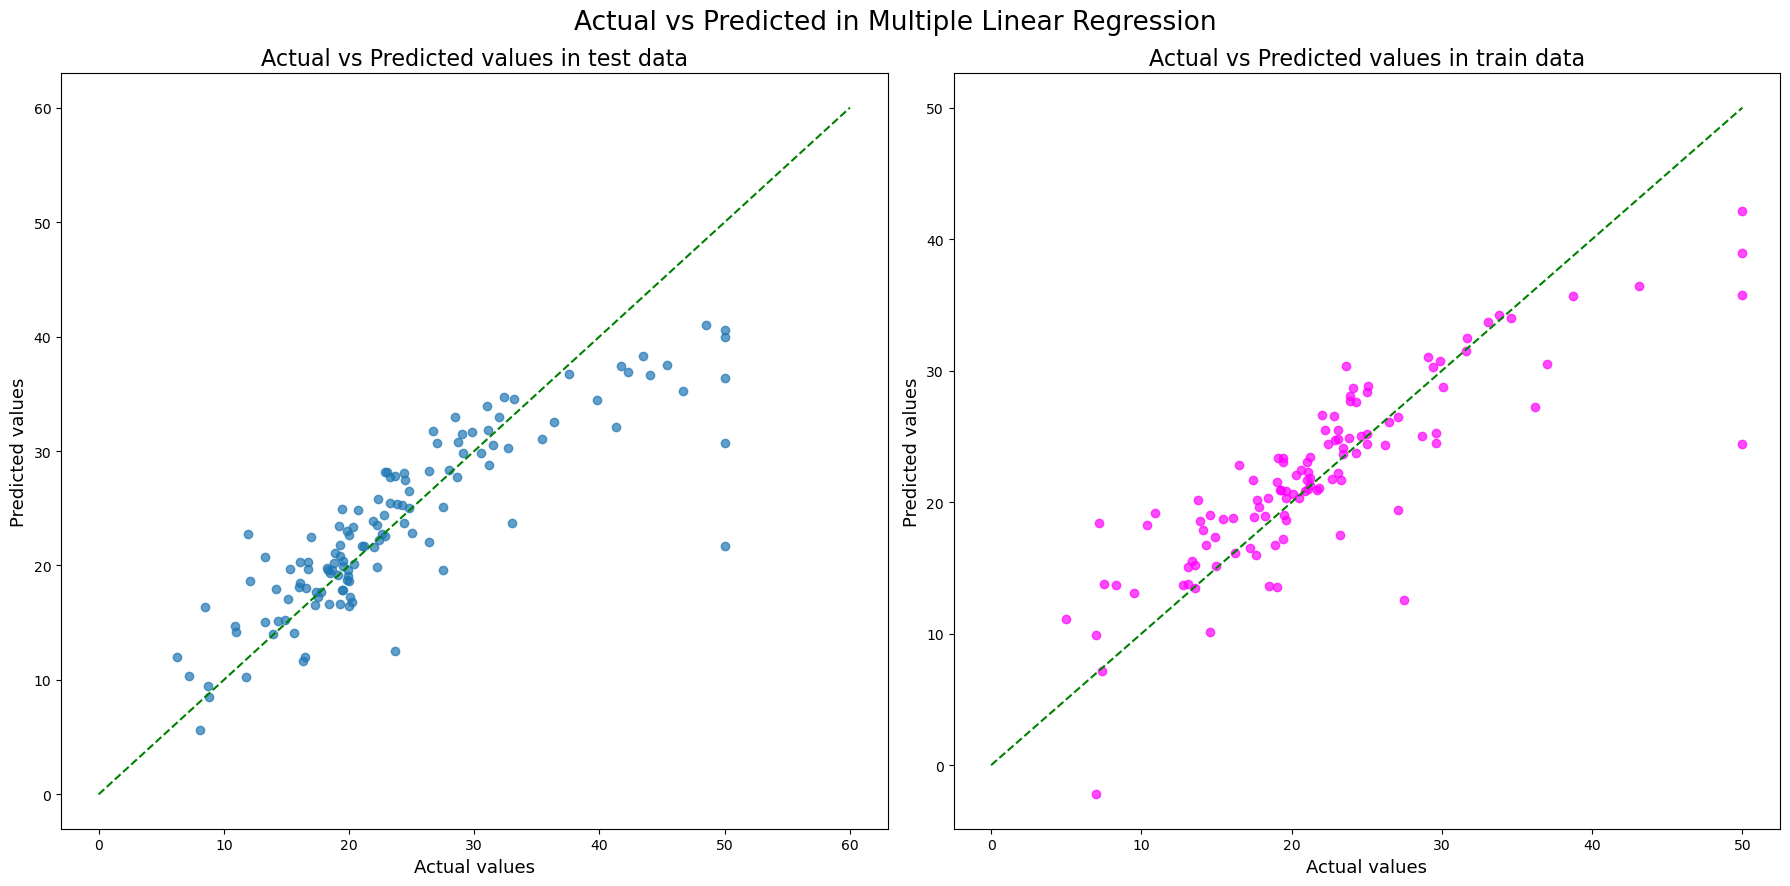

In [130]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_test, y= y_pred_rid , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_val, y = y_pred_rid_val, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)
plt.tight_layout(); 

Al igual que el modelo de regresión lineal multiple,los graficos de dispersión se observan valores atipicos o outliers, una mayor dispersion en los valores del test, lo cual puede estar afectando a los resultados en R2. 

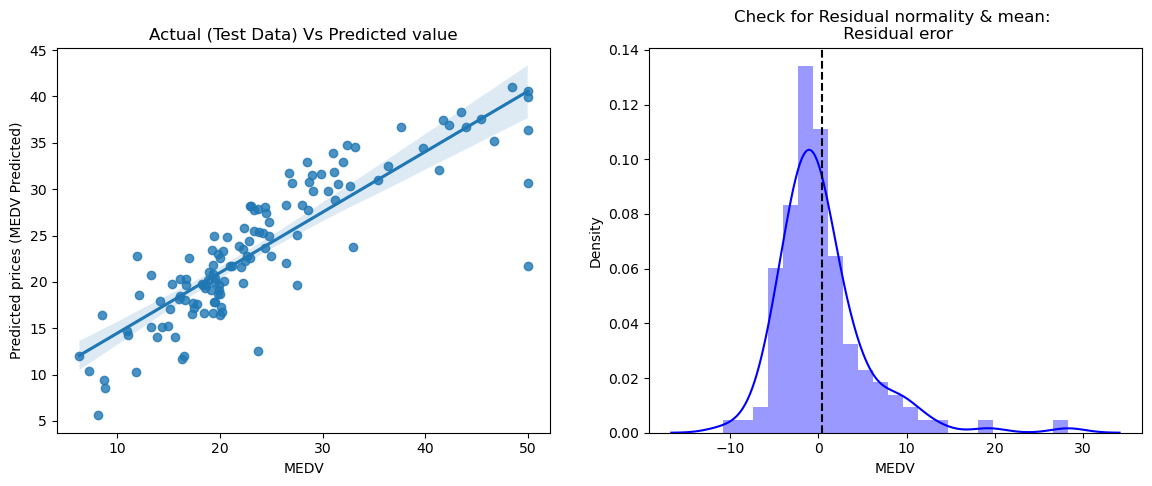

In [131]:
# Plotting Actual observations vs predicted observations Test Data
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=y_pred_rid, x=y_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_test - y_pred_rid)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

* En el diagrama de dispersión se puede observar que la línea diagonal no es tan recta, lo que representa las diferencias en las predicciones reales y las predictivas. 
* Los errores se centran alrededor de 0 pero están un poco sesgados a la izquierda.

**Modelo N°3: RANDOM FOREST REGRESIÓN**

* **Entrenar el modelo**

In [132]:
#Instanciar
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Entrenar
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

* **Evaluar el modelo en el conjunto de validación y test**

In [133]:
# Evaluar el modelo de regresión lineal en el conjunto de validación
val_acc = rfr.score(x_val, y_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.8088970816363044


In [134]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = rfr.score(x_test, y_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.8263868348477175


El puntaje del modelo r2 es menor en los datos de validación con respecto al test. Se puede observar que la diferencia es de 0.017. 

* **Predecir el modelo**

In [135]:
# Model prediction on validation data
y_pred_rFr_val = rfr.predict(x_val)

In [136]:
# Model prediction on train data
y_pred_rFr = rfr.predict(x_test)

In [137]:
# los 10 primeros valores de MEDV (y_pred)
y_pred_rFr[:10]

array([16.476, 24.278, 19.308, 18.724, 47.193, 23.981, 34.712, 17.702,
       14.521, 17.173])

In [138]:
prediccion_rfr = pd.DataFrame(y_pred_rFr, columns = ['PREDICCION'])
prediccion_rfr .head()

PREDICCION
0      16.476
1      24.278
2      19.308
3      18.724
4      47.193

* **Revisión de los parámetros de entrenamiento**

In [139]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

* **Evaluar el modelo**

In [140]:
# Model Evaluation on test data
evaluacion(y_test, y_pred_rFr)

R2 :  0.8263868348477175
MSE (Error cuadrático medio) :  17.419220795275585
MAE (Error Absoluto Medio) :  2.5862598425196843


El modelo de Randon forest si se obtuvieron mejores resultados, el R2 del set de test es mayor que el valiadación , asi como los valores del MSE y MAE mas cercanos al cero. Probablemte los ouliers en algunas variables pueden estar afectando.
Una funcion del Rando Forest es que se puede calcular la importancia de las variables en el modelo, quizas realizando la prediccion con las variables que mejor le dan puerza al nodo.

* **Visualización de la predicción**

Text(0.5, 1.0, 'Actual vs Predicted values in train data')

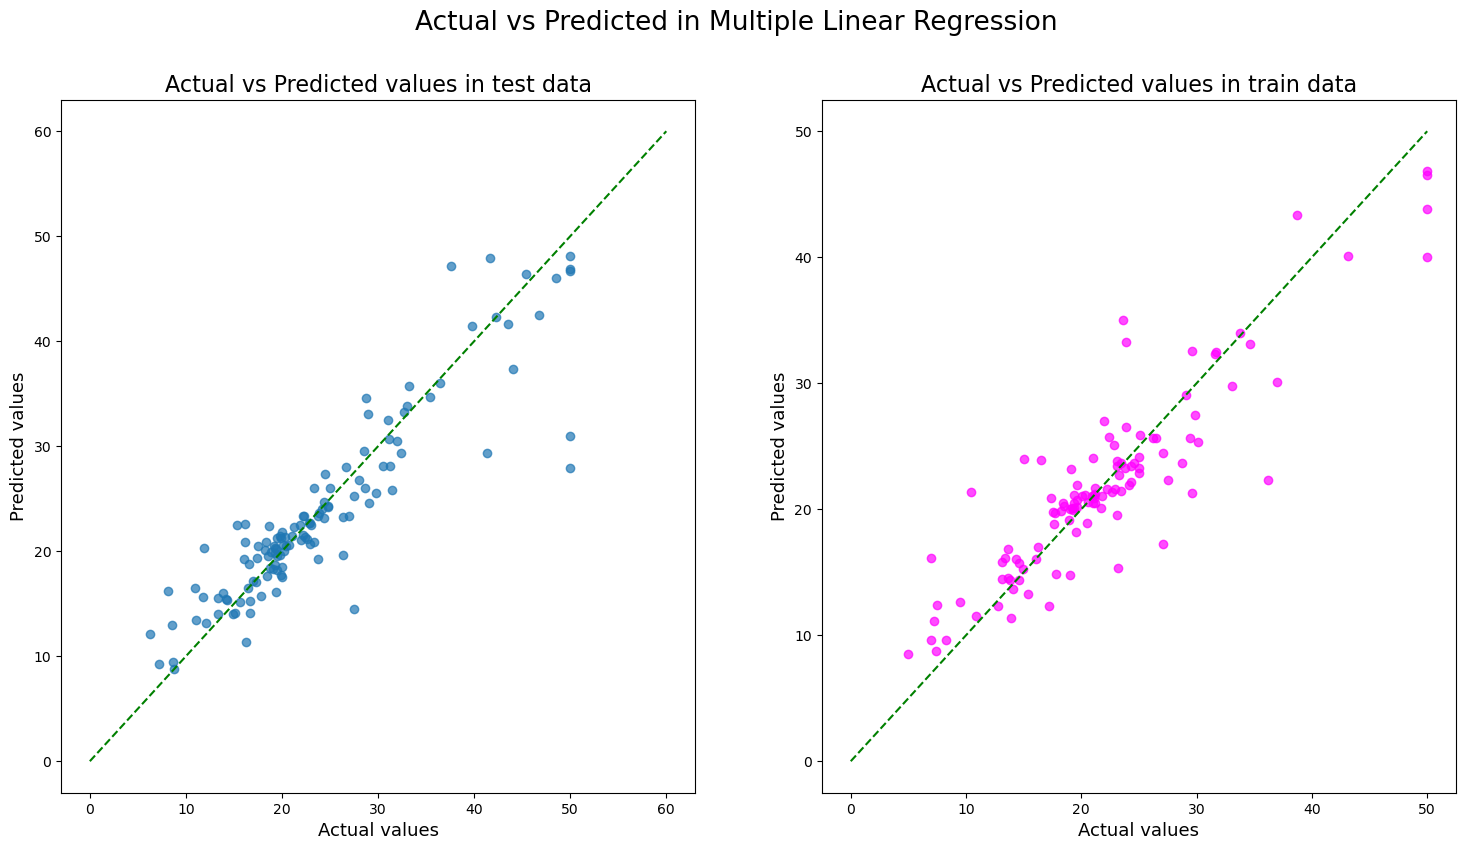

In [141]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_test, y= y_pred_rFr , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_val, y = y_pred_rFr_val, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)

Adiferencia de los modelos anteriores, al dibujar una línea de 45°, cuanto más cerca esté el diagrama de dispersión de esa línea, mejores serán las predicciones de dispersión, lo cual se puede observar los valoresmas cercanos  a la linea recta en la data del test, infiriendo una mejora en el modelo. Adcionalmente los graficos de dispersión se observan valores atipicos o outliers, una mayor dispersion en los valores del train.

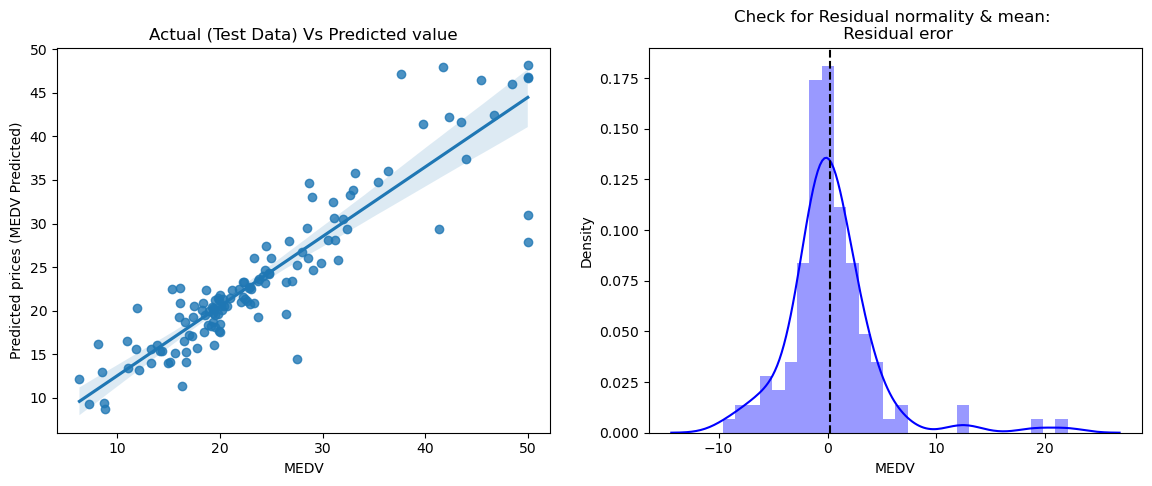

In [142]:
# Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=y_pred_rFr, x=y_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_test - y_pred_rFr)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Aunque se observa un error medio de 2.57, en la grafica se  ve claramente que esta vez los errores están más concentrados alrededor de cero que en las regresión anterior.

* **Análisis de la importancia de las variables**

RF calcula la importancia de las variables con el criterio de "decremento medio de la impureza", qué básicamente le das más valor a las variables que consiguen aumentar la pureza de los nodos. A menudo se usan para la selección de características en un flujo de trabajo de ciencia de datos. 

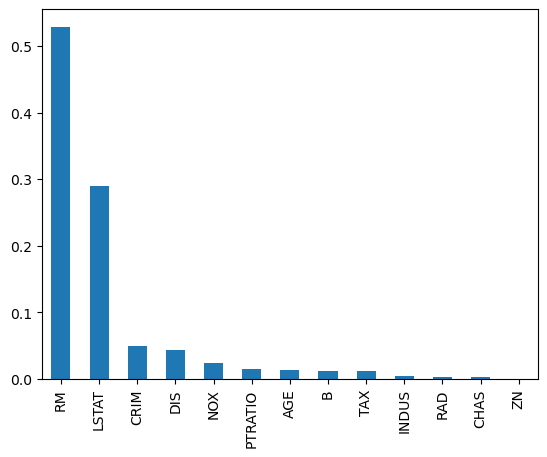

In [143]:
rfc_importances = pd.Series(rfr.feature_importances_, index=hdata_transf.drop(columns = "MEDV").columns).sort_values(ascending = False)
rfc_importances.plot(kind='bar')
plt.show()

* Podemos observar claramente que  RM, LSTAT y DIS son las características más importantes que se pueden usar para la predicción. Asi como las variables CRIM, B, INDUS, CHAS RAD y ZN no tienen gran importancia en la hora del modelajes, se pudiera evaluar el modelo sin tomar en cuenta algunas de estas variables, que coincen con tener altos valores de outliers como es el caso de las variables CRIM, B, RAD y ZN.

* **RANDOM FOREST REGRESIÓN aplicando la importancia** 

De acuerdo a los resultados de la importancia de las varaibles, se evaluará el modelo sin tomar en cuenta las variables: B, RAD y ZN.

In [144]:
 data_imp = hdata_transf.copy()

In [145]:
x_imp =  data_imp.drop(columns = ['B', 'RAD', 'ZN', 'MEDV', 'CRIM'])

In [146]:
y_imp = data_imp['MEDV']

* **Train y test**

In [156]:
# Dividir los datos de entrenamiento y test
x_imp_train, x_imp_test, y_imp_train, y_imp_test = train_test_split(x_imp, y_imp, random_state=4, train_size=0.80)
print(x_imp_train.shape, x_imp_test.shape, y_imp_train.shape, y_imp_test.shape)

(404, 9) (102, 9) (404,) (102,)


In [157]:
# Dividir los datos de entrenamiento en entrenamiento y validación
x_imp_train, x_imp_train_val, y_imp_train, y_imp_val = train_test_split(x_imp_train,y_imp_train, random_state=4, train_size=0.70)
print(x_imp_train.shape, x_imp_train_val.shape, y_imp_train.shape, y_imp_val.shape)

(282, 9) (122, 9) (282,) (122,)


* **Entrenar el modelo**

In [158]:
#Instanciar
rfr_imp = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Entrenar
rfr_imp.fit(x_imp_train, y_imp_train)

RandomForestRegressor(random_state=42)

* **Evaluar el modelo en el conjunto de validación y test**

In [159]:
# Evaluar el modelo de regresión lineal en el conjunto de validación
val_acc = rfr_imp.score(x_imp_train_val,  y_imp_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.9034306194936272


In [160]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = rfr_imp.score(x_imp_test, y_imp_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.874364420282956


El puntaje del modelo r2 es menor en los datos de validación con respecto al test. Se puede observar que la diferencia es de 0.030. 

* **Predecir el modelo**

In [161]:
# Model prediction on train data
yimp_pred_rFr_val = rfr_imp.predict(x_imp_train_val)

In [162]:
# Model prediction on train data
yimp_pred_rFr = rfr_imp.predict(x_imp_test)

In [163]:
# los 10 primeros valores de MEDV (y_pred)
yimp_pred_rFr[:10]

array([20.245, 24.108, 18.788, 20.597, 46.751, 24.116, 33.936, 16.503,
       16.723, 16.803])

In [164]:
imp_prediccion_rfr = pd.DataFrame(yimp_pred_rFr, columns = ['PREDICCION'])
imp_prediccion_rfr .head()

PREDICCION
0      20.245
1      24.108
2      18.788
3      20.597
4      46.751

* **Evaluar el modelo**

In [165]:
# Model Evaluation on test data
evaluacion(y_imp_test, yimp_pred_rFr)

R2 :  0.874364420282956
MSE (Error cuadrático medio) :  11.67019154901961
MAE (Error Absoluto Medio) :  2.165588235294116


* **Visualización de la predicción**

Text(0.5, 1.0, 'Actual vs Predicted values in train data')

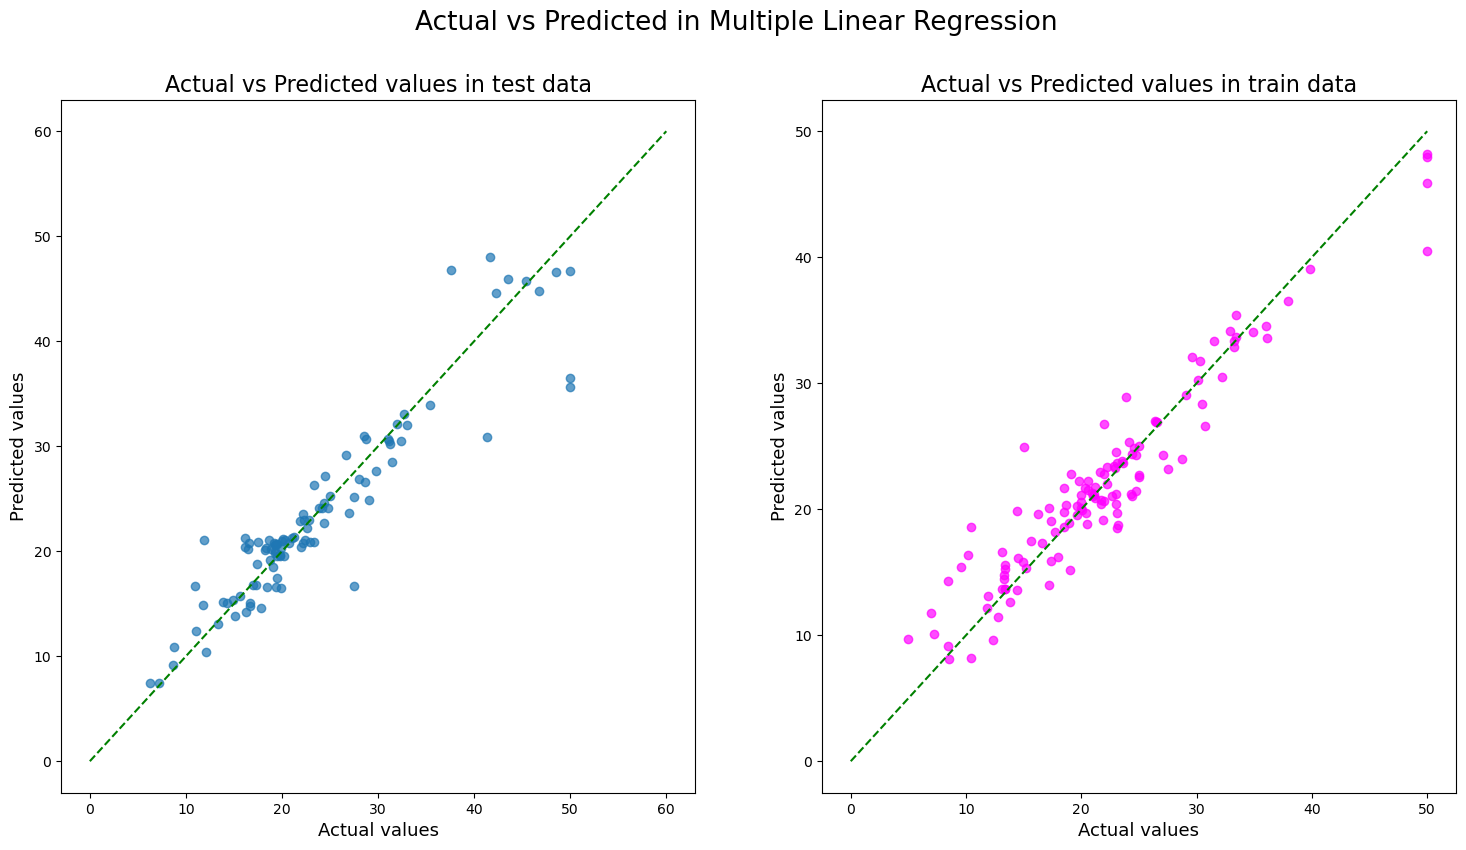

In [167]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_imp_test, y= yimp_pred_rFr , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_imp_val, y = yimp_pred_rFr_val, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)

Adiferencia de los modelos anteriores, al dibujar una línea de 45°, cuanto más cerca esté el diagrama de dispersión de esa línea, mejores serán las predicciones de dispersión, lo cual se puede observar los valores mas cercanos  a la linea recta tanto los datas del test y train, infiriendo una mejora en el modelo. Adicionalmente los graficos de dispersión se observan algunos valores atipicos o outliers.

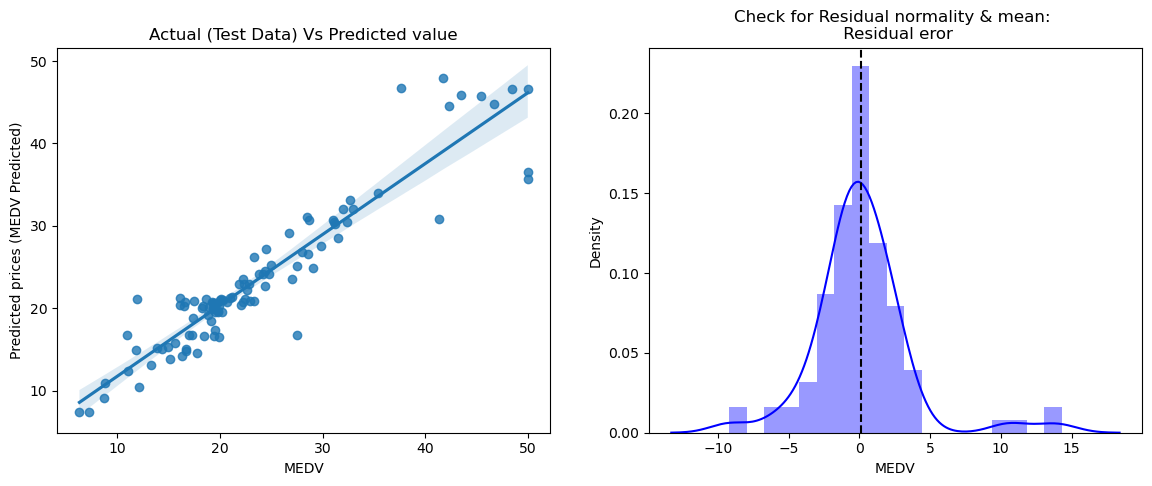

In [168]:
# Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=yimp_pred_rFr, x=y_imp_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_imp_test - yimp_pred_rFr)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

**Modelo N°4: XGBOOST REGRESIÓN**

* **Entrenar el modelo**

In [169]:
#Instanciar
xgbr = XGBRegressor (use_label_encoder=False) #lo del encoder es para que no de warning

#Entrenar
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

* **Evaluar el modelo en el conjunto de validación y test**

In [172]:
# Evaluar el modelo de regresión lineal en el conjunto de validación
val_acc = xgbr.score(x_val, y_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.8291046298615365


In [173]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = xgbr.score(x_test, y_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.8366169758239572


El puntaje del modelo r2 es menor en los datos de validación con respecto al test. Se puede observar que la diferencia es de 0.007. 

* **Predecir el modelo**

In [174]:
# Model prediction on validation data
y_pred_xgbr_val = xgbr.predict(x_val)

In [175]:
# Model prediction on test  data
y_pred_xgbr = xgbr.predict(x_test)

In [176]:
# los 10 primeros valores de MEDV (y_pred)
y_pred_xgbr[:10]

array([14.313101, 23.620586, 20.797228, 16.736776, 49.342285, 23.195583,
       35.65576 , 17.644741, 13.183771, 17.422806], dtype=float32)

In [177]:
prediccion_xgbr = pd.DataFrame(y_pred_xgbr, columns = ['PREDICCION'])
prediccion_xgbr.head()

PREDICCION
0   14.313101
1   23.620586
2   20.797228
3   16.736776
4   49.342285

* **Revisión de los parámetros de entrenamiento**

In [178]:
xgbr.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'use_label_encoder': False}

* **Evaluar el modelo**

In [179]:
# Model Evaluation on test data
evaluacion(y_test, y_pred_xgbr)

R2 :  0.8366169758239572
MSE (Error cuadrático medio) :  16.392794692879438
MAE (Error Absoluto Medio) :  2.548334715685506


* **Visualización de la predicción**

Text(0.5, 1.0, 'Actual vs Predicted values in train data')

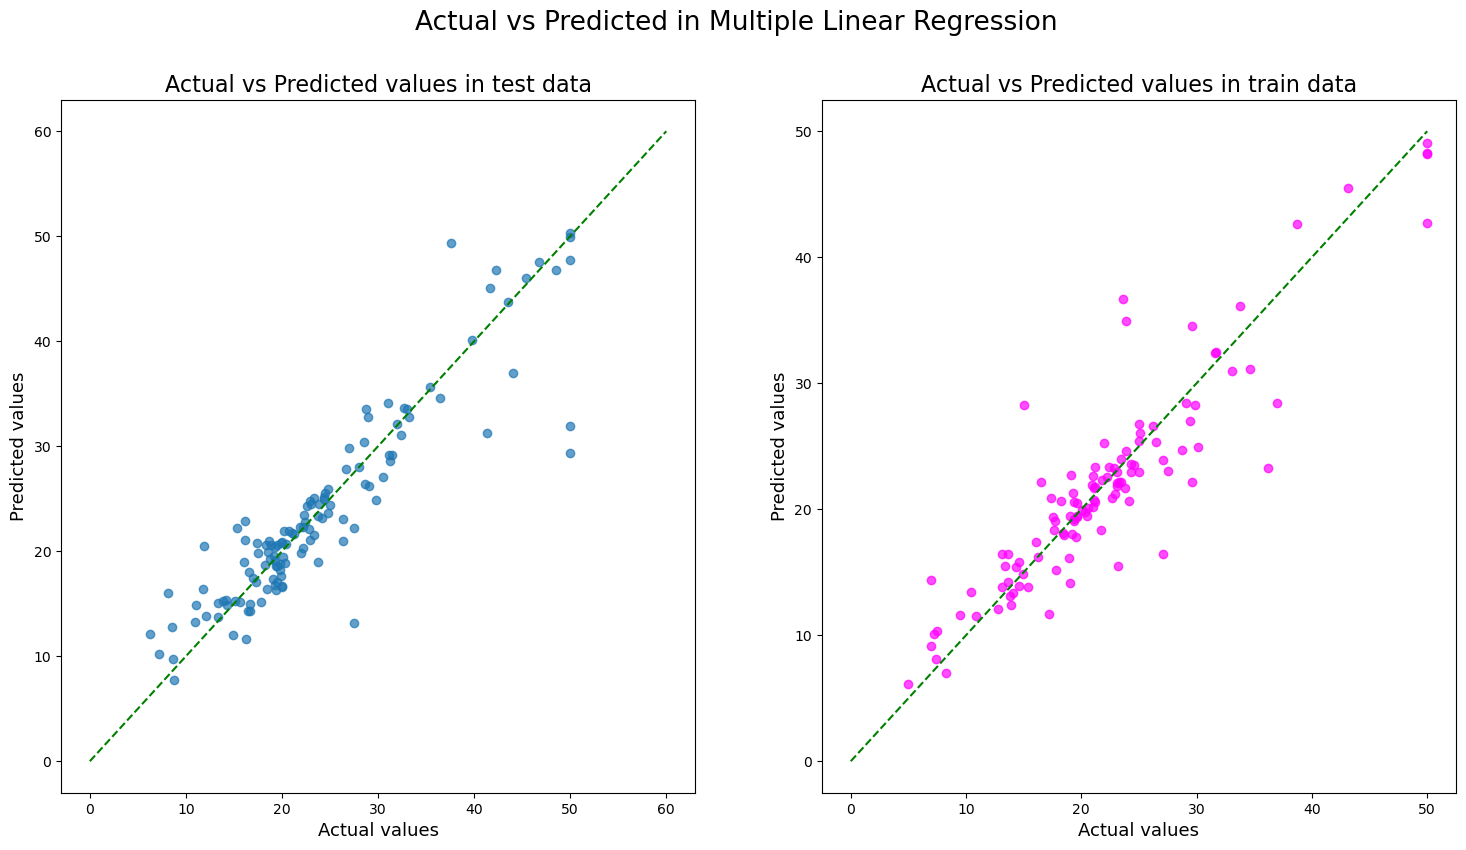

In [180]:
# Plotting Actual observations vs predicted observations Test Data vs Train Data
#now we plot them 
plt.figure(figsize = (18,9)) 
plt.suptitle('Actual vs Predicted in Multiple Linear Regression', fontsize = 19)

plt.subplot(121)
plt.scatter(x= y_test, y= y_pred_xgbr , alpha = 0.7)
plt.plot([0, 60], [0, 60], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize= 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in test data', fontsize = 16)

plt.subplot(122)
plt.scatter(x=y_val, y = y_pred_xgbr_val, alpha = 0.7, c = 'magenta')
plt.plot([0, 50], [0, 50], color = 'green', linewidth = 1.5, linestyle = 'dashed')
plt.xlabel('Actual values', fontsize = 13)
plt.ylabel('Predicted values', fontsize = 13)
plt.title('Actual vs Predicted values in train data', fontsize = 16)

Al agual que el modelo de Random Forest con la importancia de variables, al dibujar una línea de 45°, cuanto más cerca esté el diagrama de dispersión de esa línea, mejores serán las predicciones de dispersión, lo cual se puede observar los valores mas cercanos a la linea recta tanto los datas del test y train, infiriendo una mejora en el modelo. Adicionalmente los graficos de dispersión se observan algunos valores atipicos o outliers en el grafico del Test, probalemte esté afectando el overfiting del modelo.

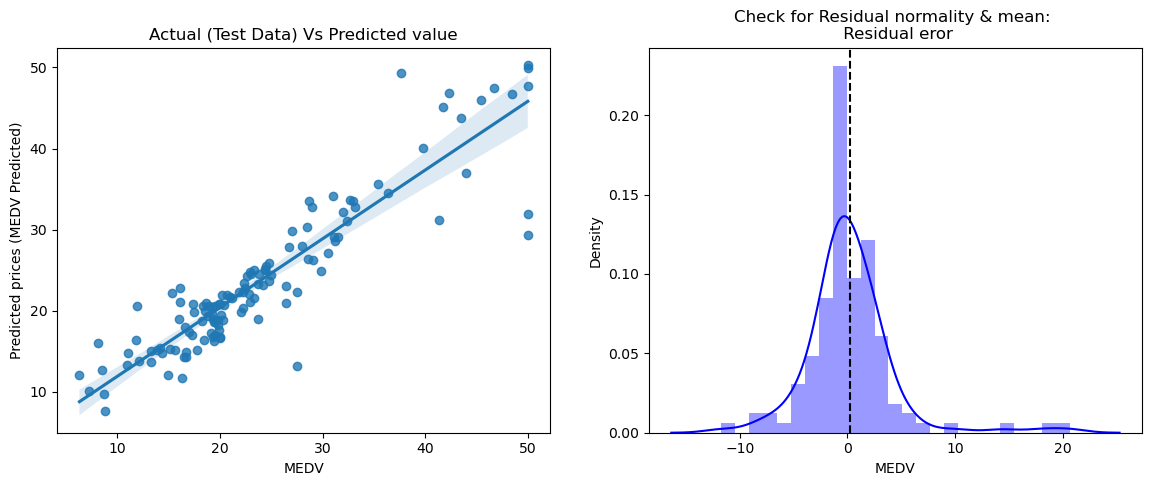

In [181]:
# Plotting Actual observations vs predicted observations
import matplotlib.pyplot as plt 
import seaborn as sns
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y=y_pred_xgbr, x=y_test, ax=ax)
plt.ylabel("Predicted prices (MEDV Predicted)")
ax.set_title('Actual (Test Data) Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
a=(y_test - y_pred_xgbr)
sns.distplot(a,ax=ax,color='b')
ax.axvline(a.mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

* **Análisis de la importancia de las variables**

XGBoost calcula la importancia de las variables como la ganancia media en todos los nodos en los que se ha usado la variable.

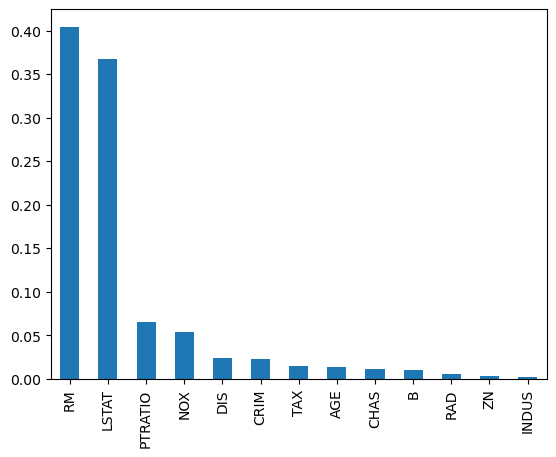

In [182]:
pd.Series(xgbr.feature_importances_,index = x_test.columns).sort_values(ascending = False).plot(kind = 'bar');

* Podemos observar que LSTAT y RM son las características más importantes que se pueden usar para la predicción.

<div class="alert alert-block alert-info">
<b>Ejercicio 2:</b>  Comparar en base al MSE y al R2.
</div>

Se realizó la comparación de los modelos en funcion de los resultados del Test.

In [183]:
# define a function to get the results to a dataframe: 
def get_results(data, predicted): 
    r2_square = metrics.r2_score(data, predicted)
    mse = metrics.mean_squared_error(data, predicted)
    errors = mean_absolute_error(data, predicted)
    return r2_square, mse,errors    

In [185]:
results_df = pd.DataFrame(data = [['Multiple Linear Regression', get_results(y_test, y_pred_rm)[0], 
                        get_results(y_test, y_pred_rm)[1], get_results(y_test, y_pred_rm)[2]], 
                                  ['MLR Regularizacion Ridge', get_results(y_test, y_pred_rid)[0], 
                        get_results(y_test, y_pred_rid)[1], get_results(y_test, y_pred_rid)[2]], 
                                  ['Random Forest Regression', get_results(y_test, y_pred_rFr)[0], 
                        get_results(y_test, y_pred_rFr)[1], get_results(y_test, y_pred_rFr)[2]], 
                                  ['Random Forest Regression IMP', get_results(y_imp_test, yimp_pred_rFr)[0], 
                        get_results(y_imp_test, yimp_pred_rFr)[1], get_results(y_imp_test, yimp_pred_rFr)[2]], 
                                  ['XGBoost Regression', get_results(y_test, y_pred_xgbr)[0], 
                        get_results(y_test, y_pred_xgbr)[1], get_results(y_test, y_pred_xgbr)[2]]],                                  
                        columns = ['Model', 'R2', 'MSE', 'MAE'])

results_df

Model        R2        MSE       MAE
0    Multiple Linear Regression  0.739680  26.118863  3.478967
1      MLR Regularizacion Ridge  0.738659  26.221260  3.419286
2      Random Forest Regression  0.826387  17.419221  2.586260
3  Random Forest Regression IMP  0.874364  11.670192  2.165588
4            XGBoost Regression  0.836617  16.392795  2.548335

Se puede trazar estos resultados en un gráfico para hacer una comparación entre R2:

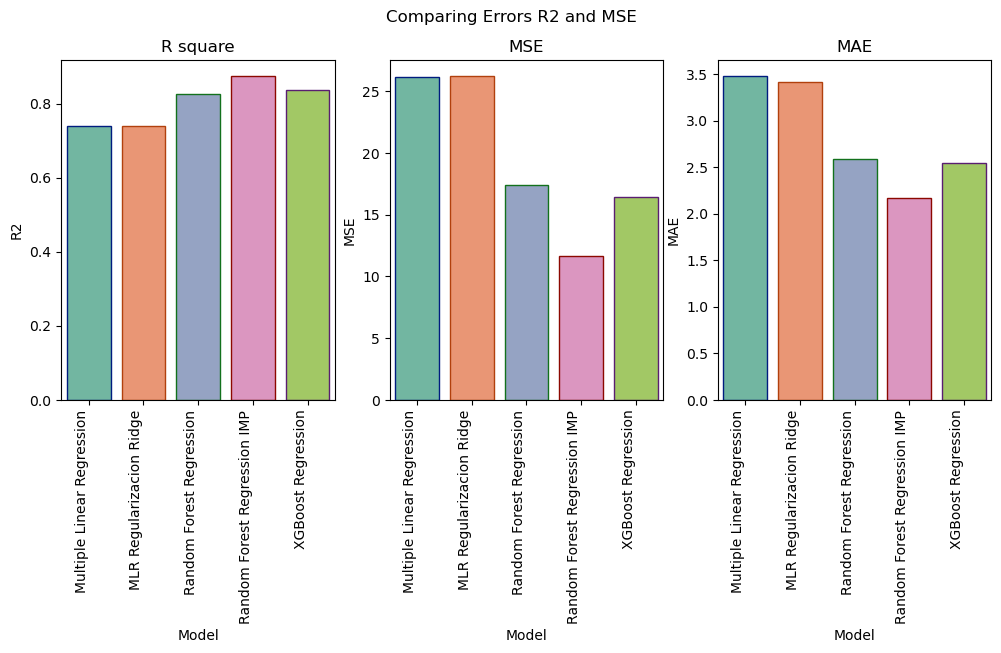

In [186]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

**Observaciones:**

* **Observaciones:**
* Random Forest y XGBoost Regression obtuvieron mejores R2 y MSE que los modelos de Multiple Linear Regression y Ridge. 
* La diferencia entre los errores abosultos de Random Forest y XGBoost Regression es mínima, sin embargo el MAE de Random Forest es menor en comparacion con el XGBoots regression.
* Por orden los siguientes modelos serían: Random Forest (base y imprtancia) y XGBoost Regression. 

<div class="alert alert-block alert-info">
<b>Ejercicio 3:</b> Entrenar utilizando los diferentes parámetros que admiten para intentar mejorar su predicción..
</div>

In [192]:
from pprint import pprint

## Hyper-Parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')

De todos los modelos evaluado, los mejores resultados son el Random forest (base e importance) y XGBoost, en este sentido se seleccionaran para ser entrenados.

* **RANDOM FOREST REGRESIÓN**

**Modelo Base**

In [193]:
# Intanciar modelo 
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)

#parametros de randon forest
rfr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [194]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
# look for params of our previous model 
from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rfr.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Ahora se entrenaremos el modelo con los siguientes parametros:

In [195]:
# Parameter grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [196]:
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=3, 
                                random_state=42, 
                                n_jobs = -1)

# Fit the random search model
rf_random.fit(x,y)

rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [198]:
# base model with validation data
# Predict with best parameters
rf_bp = RandomForestRegressor(n_estimators=800,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features='auto', max_depth=100, bootstrap= True).fit(x_train, y_train)
y_pred_rf_bp_val = rf_bp.predict(x_val)

evaluacion(y_val, y_pred_rf_bp_val)

R2 :  0.806194535363183
MSE (Error cuadrático medio) :  14.977180128700757
MAE (Error Absoluto Medio) :  2.670082236842115


In [199]:
# Predict with best parameters
rf_bp = RandomForestRegressor(n_estimators=800,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features='auto', max_depth=100, bootstrap= True).fit(x_train, y_train)
y_pred_rf_bp = rf_bp.predict(x_test)

evaluacion(y_test, y_pred_rf_bp)

R2 :  0.827162914430071
MSE (Error cuadrático medio) :  17.341353995324884
MAE (Error Absoluto Medio) :  2.607564960629934


Al igual que el modelo base, aplicando los mejores parametros al modelo, se obtuvieron una leve mejoria en los resultados, el R2 del test es mayor que el validation y la difrencia entre los dos valores de MAE (train y test) una difrencia que puede sigificar  probablemte los ouliers en algunas variables pueden estar afectando. 

**Modelo tomando en cuenta la importancia de las variables**

In [200]:
#instanciar modelo
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)

#parametros de randon forest
rfr_imp.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [201]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
# look for params of our previous model 
from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rfr_imp.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [202]:
# Parameter grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [203]:
# First create the base model to tune
rfr_imp = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random_imp = RandomizedSearchCV(estimator = rf,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=3, 
                                random_state=42, 
                                n_jobs = -1)

# Fit the random search model
rf_random_imp.fit(x_imp, y_imp)

rf_random_imp.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [204]:
# base model with train data
# Predict with best parameters
rf_bp_imp = RandomForestRegressor(n_estimators=200,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features= 'sqrt', max_depth=50, bootstrap= True).fit(x_imp_train, y_imp_train)
yimp_pred_rf_bp_val = rf_bp_imp.predict(x_imp_train_val)

evaluacion(y_imp_val, yimp_pred_rf_bp_val)

R2 :  0.8980714918136908
MSE (Error cuadrático medio) :  7.772292887295083
MAE (Error Absoluto Medio) :  2.116815573770492


In [205]:
# Predict with best parameters
rf_bp_imp = RandomForestRegressor(n_estimators=200,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features= 'sqrt', max_depth=50, bootstrap= True).fit(x_imp_train, y_imp_train)
yimp_pred_rf_bp = rf_bp_imp.predict(x_imp_test)

evaluacion(y_imp_test, yimp_pred_rf_bp)

R2 :  0.8743690524872381
MSE (Error cuadrático medio) :  11.669761267156874
MAE (Error Absoluto Medio) :  2.110642156862747


Al igual que el modelo base, aplicando los mejores parametros al modelo, se obtuvieron una leve mejoria en los resultados, el R2 del test es menor que la data de validación y la difrencia entre los dos valores de MAE (validation y test) una difrencia que puede significar probablemte existe algo de overfiting o los ouliers en algunas variables pueden estar afectando.

* **XGBOOST REGRESIÓN**

In [206]:
import xgboost as xgb

In [207]:
#intanciar el modelo
xgbr = XGBRegressor (use_label_encoder=False)

# we define the parameters we want to evaluate: 
params = { 'max_depth': [3,5,7,9,12,15,17,25], 'learning_rate': [0.001, 0.01, 0.1, 1.0], 'colsample_bytree': [0.3, 0.7]}

tuned_xgbr = xgb.XGBRegressor()

clf = GridSearchCV(estimator= tuned_xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(x_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3}
Lowest RMSE:  3.657187012241468


In [208]:
xgbr_bp = XGBRegressor(colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 3)

# fit train set 
xgbr_bp.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [209]:
# base model with validation data
# Predict with best parameters
y_pred_xgbr_bp_val = xgbr_bp.predict(x_val)

evaluacion(y_val, y_pred_xgbr_bp_val)

R2 :  0.813808631870104
MSE (Error cuadrático medio) :  14.388766922111524
MAE (Error Absoluto Medio) :  2.436236195815237


In [210]:
# Predict with best parameters Test Data
y_pred_xgbr_bp = xgbr_bp.predict(x_test)

evaluacion(y_test, y_pred_xgbr_bp)

R2 :  0.8753044392609177
MSE (Error cuadrático medio) :  12.51114512427409
MAE (Error Absoluto Medio) :  2.396988149327556


El modelo de XGBOOST aplicando el mejor parametros, al igual que el modelo base, obtuvo una ligera mejora en los R2, sin embargo el R2 del test mayor al la data de la validación.

* **Comparación de los modelos en funcion de los resultados del Test**

In [211]:
results_df_2 = pd.DataFrame(data = [['Multiple Linear Regression', get_results(y_test, y_pred_rm)[0], 
                        get_results(y_test, y_pred_rm)[1], get_results(y_test, y_pred_rm)[2]], 
                                  ['MLR Regularizacion Ridge', get_results(y_test, y_pred_rid)[0], 
                        get_results(y_test, y_pred_rid)[1], get_results(y_test, y_pred_rid)[2]], 
                                  ['Random Forest Regression', get_results(y_test, y_pred_rFr)[0], 
                        get_results(y_test, y_pred_rFr)[1], get_results(y_test, y_pred_rFr)[2]], 
                                  ['Random Forest Regression IMP', get_results(y_imp_test, yimp_pred_rFr)[0], 
                        get_results(y_imp_test, yimp_pred_rFr)[1], get_results(y_imp_test, yimp_pred_rFr)[2]], 
                                  ['Random Forest Regression BP', get_results(y_test, y_pred_rf_bp)[0], 
                        get_results(y_test, y_pred_rf_bp)[1], get_results(y_test, y_pred_rf_bp)[2]],
                                  ['Random Forest Regression IMP BP', get_results(y_imp_test, yimp_pred_rf_bp)[0], 
                        get_results(y_imp_test, yimp_pred_rf_bp)[1], get_results(y_imp_test, yimp_pred_rf_bp)[2]],
                                  ['XGBoost Regression', get_results(y_test, y_pred_xgbr)[0], 
                        get_results(y_test, y_pred_xgbr)[1], get_results(y_test, y_pred_xgbr)[2]],  
                                  ['XGBoost Regression BP', get_results(y_test, y_pred_xgbr_bp)[0], 
                        get_results(y_test, y_pred_xgbr_bp)[1], get_results(y_test, y_pred_xgbr_bp)[2]]],                                
                        columns = ['Model', 'R2', 'MSE', 'MAE'])

results_df_2

Model        R2        MSE       MAE
0       Multiple Linear Regression  0.739680  26.118863  3.478967
1         MLR Regularizacion Ridge  0.738659  26.221260  3.419286
2         Random Forest Regression  0.826387  17.419221  2.586260
3     Random Forest Regression IMP  0.874364  11.670192  2.165588
4      Random Forest Regression BP  0.827163  17.341354  2.607565
5  Random Forest Regression IMP BP  0.874369  11.669761  2.110642
6               XGBoost Regression  0.836617  16.392795  2.548335
7            XGBoost Regression BP  0.875304  12.511145  2.396988

Se puede trazar estos resultados en un gráfico para hacer una comparación entre R2:

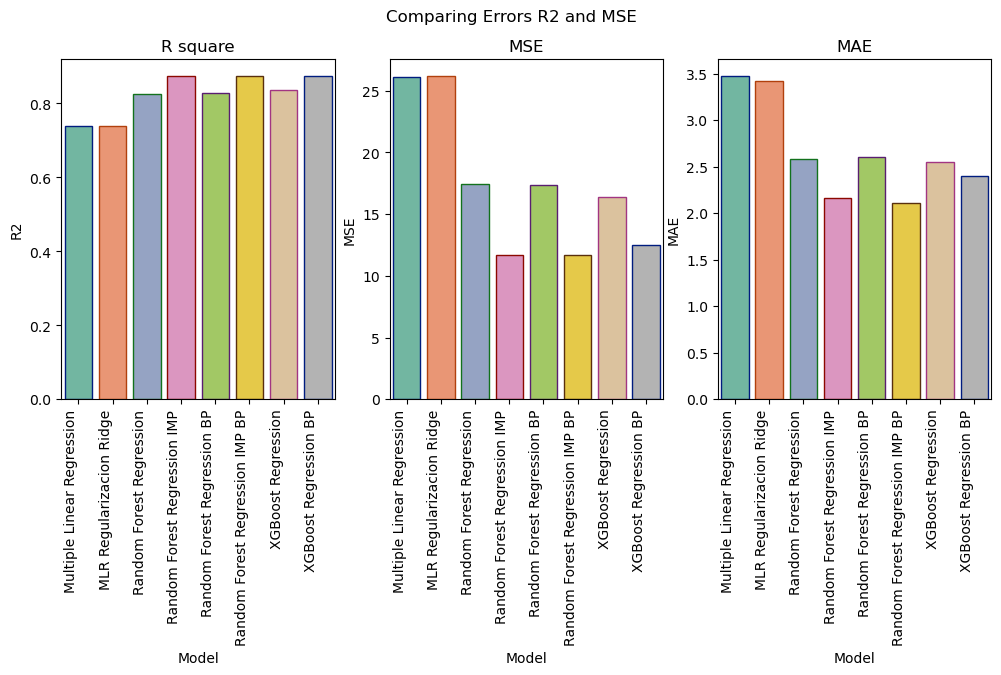

In [212]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results_df_2, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results_df_2, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results_df_2, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

* **Observaciones**
* Random Forest IMP BP (aplicando la importancia de las variables) y XGBoost Regression BP tienen mejores resultados en comparacion que el restos de los modelos, sin embargo sin embargo el MAE y MSE de Random Forest BP IMP es menor en comparacion con el XGBoots regression. 
* Por orden los siguientes modelos serían: Random Forest IMP BP (imprtancia) y XGBoost Regression.

<div class="alert alert-block alert-info">
<b>Ejercicio 4:</b> Comparar su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).
</div>

* De todos los modelos evaluado, los mejores resultados son el Random forest y XGBoost, en este sentido se seleccionaran para la validación interna. 
* Para hacer la comparativa de validaciones con los diferentes data sets (todos los datos) del modelo, nuevamente realizaré la instanciación de los modelos seleccionados con los mejores parámetros encontrado.

In [213]:
from sklearn.model_selection import cross_val_score

* **RANDOM FOREST REGRESIÓN**

* **Modelo Base**

In [214]:
## Instanciar el modelo con los mejores parametros
rf_cv = RandomForestRegressor(n_estimators = 800, min_samples_split = 2, min_samples_leaf = 1, max_features='auto',
                              max_depth = 100, bootstrap = True, random_state = 42)

In [215]:
# apply cross validation for r2
r2_scores_rfr = cross_val_score(rf_cv, x, y, cv = 5, scoring = 'r2')
r2_rfr =np.mean(r2_scores_rfr).round(4)
print('Métricas: ', r2_scores_rfr)
print ('Media métricas: ', r2_rfr)

Métricas:  [0.7693845  0.86243796 0.73536691 0.47331271 0.29537449]
Media métricas:  0.6272


In [318]:
# apply cross validation for mse
mse_scores_rfr = cross_val_score(rf_cv, x, y, cv=5, scoring='neg_mean_squared_error')
mse_rfr  = abs(np.mean(mse_scores_rfr))
print('Métricas: ', mse_scores_rfr)
print ('Media métricas: ', mse_rfr)

Métricas:  [ -7.96435125 -12.52320136 -21.19372418 -46.19671721 -18.73480624]
Media métricas:  21.322560049711786


In [319]:
# apply cross validation for MAE
mae_scores_rfr = cross_val_score(rf_cv, x, y, cv=5, scoring='neg_mean_absolute_error')
mae_rfr  = abs(np.mean(mae_scores_rfr))
print('Métricas: ', mae_scores_rfr)
print ('Media métricas: ', mae_rfr)

Métricas:  [-2.10916422 -2.53403837 -3.39035149 -3.78283416 -3.15420792]
Media métricas:  2.994119229275866


In [320]:
# save it to a dataframe 
rf_results = pd.DataFrame(data = [['Random Forest Regression BP_CV', r2_rfr, mse_rfr, mae_rfr]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
rf_results

Model      R2       MSE       MAE
0  Random Forest Regression BP_CV  0.6272  21.32256  2.994119

* **Modelo que incluye la importancia de las variables**

In [219]:
## Instanciar el modelo con los mejores parametros
rf_imp_cv = RandomForestRegressor(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features='sqrt',
                              max_depth = 50, bootstrap = True, random_state = 42)

In [220]:
# apply cross validation for r2
r2_scores_rfr_cv = cross_val_score(rf_imp_cv, x_imp, y_imp, cv = 5, scoring = 'r2')
r2_rfr_cv =np.mean(r2_scores_rfr_cv.round(4))
print('Métricas: ', r2_rfr_cv )
print ('Media métricas: ', r2_rfr_cv )

Métricas:  0.6475799999999999
Media métricas:  0.6475799999999999


In [321]:
# apply cross validation for mse
mse_scores_rfr_cv = cross_val_score(rf_imp_cv, x_imp, y_imp, cv=5, scoring='neg_mean_squared_error')
mse_rfr_cv  = abs(np.mean(mse_scores_rfr_cv))
print('Métricas: ', mse_rfr_cv)
print ('Media métricas: ', mse_rfr_cv)

Métricas:  20.11166452057368
Media métricas:  20.11166452057368


In [322]:
# apply cross validation for MAE
mae_scores_rfr_cv = cross_val_score(rf_imp_cv, x_imp, y_imp, cv=5, scoring='neg_mean_absolute_error')
mae_rfr_cv  = abs(np.mean(mae_scores_rfr_cv))
print('Métricas: ', mae_rfr_cv )
print ('Media métricas: ', mae_rfr_cv )

Métricas:  2.990186400698895
Media métricas:  2.990186400698895


In [323]:
# save it to a dataframe 
rf_imp_results = pd.DataFrame(data = [['Random Forest Regression IMP BP_CV', r2_rfr_cv, mse_rfr_cv, mae_rfr_cv]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
rf_imp_results

Model       R2        MSE       MAE
0  Random Forest Regression IMP BP_CV  0.64758  20.111665  2.990186

* **XGBOOST REGRESIÓN**

In [224]:
## Instanciar el modelo
xgbr = XGBRegressor(colsample_bytree= 0.3, learning_rate= 0.1, max_depth= 3)

In [225]:
# apply cross validation for r2
r2_scores_xgbr = cross_val_score(xgbr, x, y, cv = 5, scoring = 'r2')
r2_xgbr =np.mean(r2_scores_xgbr).round(4)
print('Métricas: ', r2_scores_xgbr)
print ('Media métricas: ', r2_xgbr)

Métricas:  [0.78913612 0.77892922 0.7386705  0.55875892 0.43183154]
Media métricas:  0.6595


In [324]:
# apply cross validation for mse
mse_scores_xgbr = cross_val_score(xgbr, x, y, cv=5, scoring='neg_mean_squared_error')
mse_xgbr  = abs(np.mean(mse_scores_xgbr))
print('Métricas: ', mse_scores_xgbr)
print ('Media métricas: ', mse_xgbr)

Métricas:  [ -9.16925408 -13.80697445 -14.79106406 -41.8414085  -18.68015351]
Media métricas:  19.65777091942209


In [325]:
# apply cross validation for MAE
mae_scores_xgbr = cross_val_score(xgbr, x, y, cv=5, scoring='neg_mean_absolute_error')
mae_xgbr  = abs(np.mean(mae_scores_xgbr))
print('Métricas: ', mae_scores_xgbr)
print ('Media métricas: ', mae_xgbr)

Métricas:  [-2.26565811 -2.90137176 -3.075199   -3.62664502 -3.18994392]
Media métricas:  3.011763562832127


In [326]:
# save it to a dataframe 
xgbr_results = pd.DataFrame(data = [['XGBoost Regression BP_CV', r2_xgbr, mse_xgbr, mae_xgbr]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
xgbr_results

Model      R2        MSE       MAE
0  XGBoost Regression BP_CV  0.6595  19.657771  3.011764

* **Comparar los resultados de los modelos seleccionados**

In [327]:
results_df_3 = pd.concat([results_df_2, rf_results, rf_imp_results, xgbr_results]).reset_index(drop=True)
results_df_3

Model        R2        MSE       MAE
0           Multiple Linear Regression  0.739680  26.118863  3.478967
1             MLR Regularizacion Ridge  0.738659  26.221260  3.419286
2             Random Forest Regression  0.826387  17.419221  2.586260
3         Random Forest Regression IMP  0.874364  11.670192  2.165588
4          Random Forest Regression BP  0.827163  17.341354  2.607565
5      Random Forest Regression IMP BP  0.874369  11.669761  2.110642
6                   XGBoost Regression  0.836617  16.392795  2.548335
7                XGBoost Regression BP  0.875304  12.511145  2.396988
8       Random Forest Regression BP_CV  0.627200  21.322560  2.994119
9   Random Forest Regression IMP BP_CV  0.647580  20.111665  2.990186
10            XGBoost Regression BP_CV  0.659500  19.657771  3.011764

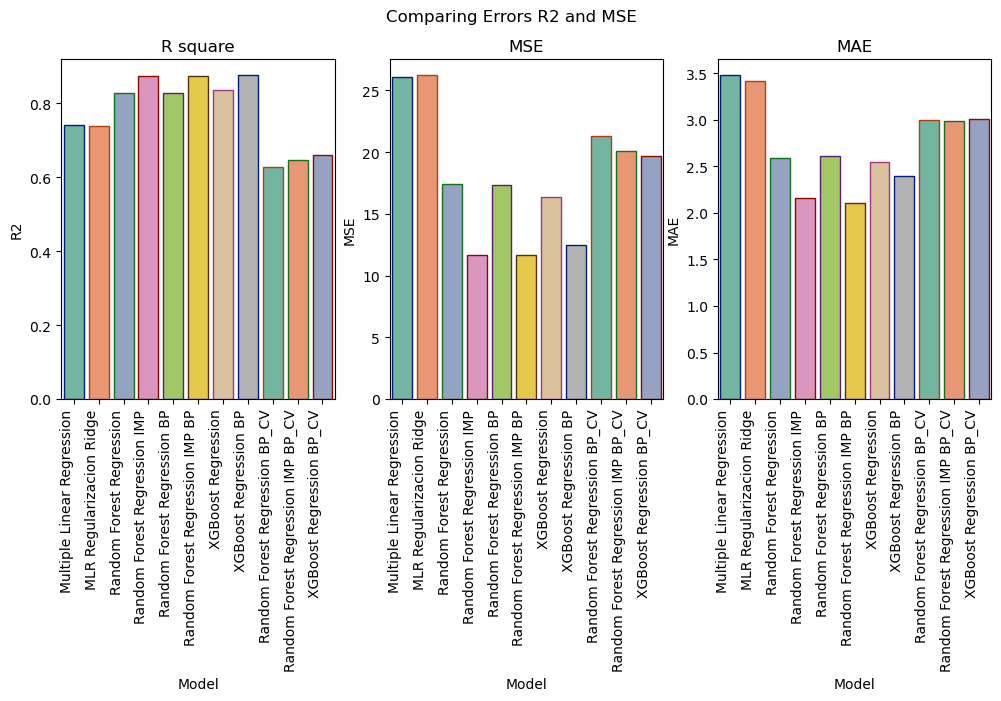

In [328]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

* **Observaciones**
* Random Forest IMP BP (aplicando la importancia de las variables) y XGBoost Regression BP tienen mejores resultados en comparacion que el restos de los modelos, sin embargo sin embargo el MAE y MSE de Random Forest BP IMP es menor en comparacion con el XGBoots regression. 
* Por orden los siguientes modelos serían: Random Forest IMP BP (imprtancia) y XGBoost Regression.

<div class="alert alert-block alert-info">
<b>Ejercicio 5:</b> No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.
</div>

In [238]:
# Make copy of Dataset transf
data_transf_1 = hdata_transf.copy()
data_transf_1

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0   -0.069593  1.44  0.067815     0  0.314815  0.496612  0.641607  0.285777   
1   -0.063755  0.00  0.242302     0  0.172840  0.287940  0.782698  0.569789   
2   -0.063760  0.00  0.242302     0  0.172840  1.323171  0.599382  0.569789   
3   -0.062347  0.00  0.063050     0  0.150206  1.069783  0.441813  0.924391   
4   -0.052144  0.00  0.063050     0  0.150206  1.271680  0.528321  0.924391   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501 -0.053930  0.00  0.420455     0  0.386831  0.521003  0.681771 -0.236007   
502 -0.058759  0.00  0.420455     0  0.386831 -0.119919  0.760041 -0.297887   
503 -0.054450  0.00  0.420455     0  0.386831  1.039973  0.907312 -0.336744   
504 -0.040867  0.00  0.420455     0  0.386831  0.793360  0.889804 -0.265053   
505 -0.058164  0.00  0.420455     0  0.386831 -0.241870  0.802266 -0.227459   

      RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0   -0.20  0.208015 -1.339286  0.261902 -0.637681  24.0  
1   -0.15  0.104962 -0.446429  0.261902 -0.221889  21.6  
2   -0.15  0.104962 -0.446429  0.066675 -0.732634  34.7  
3   -0.10  0.066794 -0.125000  0.153016 -0.841579  33.4  
4   -0.10  0.066794 -0.125000  0.261902 -0.602699  36.2  
..    ...       ...       ...       ...       ...   ...  
501 -0.20  0.164122  0.696429  0.026382 -0.168916  22.4  
502 -0.20  0.164122  0.696429  0.261902 -0.227886  20.6  
503 -0.20  0.164122  0.696429  0.261902 -0.571714  23.9  
504 -0.20  0.164122  0.696429  0.096414 -0.487756  22.0  
505 -0.20  0.164122  0.696429  0.261902 -0.347826  11.9  

[506 rows x 14 columns]

In [239]:
# define new target & features without RM
x1 = data_transf_1.drop(columns = ['MEDV','RM'])
y1 =data_transf_1['MEDV']

In [240]:
# check features
x1.head()

CRIM    ZN     INDUS  CHAS       NOX       AGE       DIS   RAD  \
0 -0.069593  1.44  0.067815     0  0.314815  0.641607  0.285777 -0.20   
1 -0.063755  0.00  0.242302     0  0.172840  0.782698  0.569789 -0.15   
2 -0.063760  0.00  0.242302     0  0.172840  0.599382  0.569789 -0.15   
3 -0.062347  0.00  0.063050     0  0.150206  0.441813  0.924391 -0.10   
4 -0.052144  0.00  0.063050     0  0.150206  0.528321  0.924391 -0.10   

        TAX   PTRATIO         B     LSTAT  
0  0.208015 -1.339286  0.261902 -0.637681  
1  0.104962 -0.446429  0.261902 -0.221889  
2  0.104962 -0.446429  0.066675 -0.732634  
3  0.066794 -0.125000  0.153016 -0.841579  
4  0.066794 -0.125000  0.261902 -0.602699

* **Dividir los datos de entrenamiento, validación y test**

In [255]:
#Split new target & features without RM
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=4, train_size = 0.80)

print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(404, 12) (102, 12) (404,) (102,)


In [256]:
# Dividir los datos de entrenamiento en entrenamiento y validación
x1_train, x1_val, y1_train, y1_val = train_test_split(x1_train, y1_train, random_state=4, test_size=0.2)
print(x1_train.shape, x1_val.shape, y1_train.shape, y1_val.shape)

(323, 12) (81, 12) (323,) (81,)


---

* **Evaluar en función de los modelos seleccionados en el primer ejercicio**

* **N°1: REGRESIÓN LINEAL MÚLTIPLE**

In [257]:
#Instanciar
rm1 = LinearRegression()

#Entrenar
rm1.fit(x1_train, y1_train)

LinearRegression()

In [258]:
#Evaluar el modelo de regresión lineal multiple en el conjunto de validación
val_acc = rm1.score(x1_val, y1_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.7049293607154461


In [259]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = rm1.score(x1_test, y1_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.6939250169692498


In [261]:
#predecir on el test
y1_pred_rm1 = rm1.predict(x1_test)

In [262]:
# los 10 primeros valores de MEDV (y_pred)
y1_pred_rm1[:10]

array([10.04171651, 26.48368765, 18.63095072, 18.80334471, 33.49449168,
       24.52768989, 29.67630164, 18.67664813, 17.17148209, 23.75645872])

In [263]:
#Evaluar el modelo con el test
evaluacion(y1_test, y1_pred_rm1)

R2 :  0.6939250169692498
MSE (Error cuadrático medio) :  28.431067762623634
MAE (Error Absoluto Medio) :  3.8302106802167724


* **Modelo N°2: Ridge Regression**

In [264]:
#Instanciar
ridge = Ridge()

#Entrenar
ridge.fit(x1_train, y1_train)

Ridge()

* **Evaluar modelo con datos de la validación y el test**

In [265]:
#Evaluar el modelo de regresión lineal multiple en el conjunto de validación
val_acc = ridge.score(x1_val, y1_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.702610993749866


In [266]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = ridge.score(x1_test, y1_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.6907942190867886


* **Predecir el modelo**

In [268]:
# Model prediction on test data
y1_pred_rid = ridge.predict(x1_test)

In [269]:
# los 10 primeros valores de MEDV (y_pred)
y1_pred_rid[:10]

array([ 9.8338737 , 26.2115501 , 18.81624814, 18.32646614, 33.12311451,
       24.50558613, 29.38966338, 18.35269719, 16.79082657, 24.48115334])

In [270]:
prediccion = pd.DataFrame(y1_pred_rid, columns = ['PREDICCION'])
prediccion.head()

PREDICCION
0    9.833874
1   26.211550
2   18.816248
3   18.326466
4   33.123115

In [272]:
# Model Evaluation on test data
evaluacion(y1_test, y1_pred_rid)

R2 :  0.6907942190867886
MSE (Error cuadrático medio) :  28.721885149480723
MAE (Error Absoluto Medio) :  3.807074206118929


Se obtuvo el mismo puntaje r2 que en el modelo de regresion lineal multiple, probablemente no exista overfitting, pueda que existan alguna cantidad excesiva de Dimensiones (features), sin suficientes muestras o los altos valores de outliers que aun presentan este afectando los resultados. Sin embargo se continuará evaluando otros modelos para verificar si exisa alguna mejora. 

* **Modelo N°3: RANDOM FOREST REGRESIÓN**

* **Modelo Base**

In [273]:
#Instanciar
rfr1 = RandomForestRegressor(n_estimators = 100, random_state = 42)

#Entrenar
rfr1.fit(x1_train,y1_train)

RandomForestRegressor(random_state=42)

* **Evaluar modelo con datos de la validación y el test**

In [274]:
#Evaluar el modelo de regresión lineal multiple en el conjunto de validación
val_acc = rfr1.score(x1_val, y1_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.8124654428120028


In [275]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = rfr1.score(x1_test, y1_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.840618215524606


In [276]:
#predecir el modelo con la data de validacion
y1_pred_rFr1_val = rfr1.predict(x1_val)

In [277]:
#predecir el modelo con el test
y1_pred_rFr1 = rfr1.predict(x1_test)

In [278]:
# los 10 primeros valores de MEDV (y_pred)
y1_pred_rFr1[:10]

array([19.714, 22.631, 20.014, 20.159, 46.65 , 24.146, 28.709, 18.399,
       14.886, 16.838])

In [279]:
#Evaluar el modelo con el test
evaluacion(y1_test, y1_pred_rFr1)

R2 :  0.840618215524606
MSE (Error cuadrático medio) :  14.804850333333345
MAE (Error Absoluto Medio) :  2.8203921568627446


El valor del R2 del test es menor que el del train, al igual que los modelos evaluados incluyendo la variable RM.

* **Modelo N°4: XGBOOST REGRESIÓN**

In [280]:
#Instanciar
xgbr1 = XGBRegressor (use_label_encoder=False) #lo del encoder es para que no de warning

#Entrenar
xgbr1.fit(x1_train,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

* **Evaluar modelo con datos de la validación y el test**

In [281]:
#Evaluar el modelo de regresión lineal multiple en el conjunto de validación
val_acc = xgbr1.score(x1_val, y1_val)
print("Exactitud en el conjunto de validación (regresión lineal):", val_acc)

Exactitud en el conjunto de validación (regresión lineal): 0.8007928397238592


In [282]:
# Evaluar los modelos en el conjunto de prueba
test_acc_linear = xgbr1.score(x1_test, y1_test)
print("Exactitud en el conjunto de prueba (regresión lineal):", test_acc_linear)

Exactitud en el conjunto de prueba (regresión lineal): 0.8269143303573178


In [283]:
#Predecir el modelo para la data de validacion
y1_pred_xgbr1_val = xgbr1.predict(x1_val)

In [284]:
#Predecir el modelo para el test
y1_pred_xgbr1 = xgbr1.predict(x1_test)

In [285]:
# los 10 primeros valores de MEDV (y_pred)
y1_pred_xgbr1[:10]

array([16.394415, 23.080612, 19.094307, 21.034876, 51.825775, 24.319572,
       26.92062 , 18.989998, 16.137453, 17.367561], dtype=float32)

In [286]:
#Evaluar el modelo del Test
evaluacion(y1_test, y1_pred_xgbr1)

R2 :  0.8269143303573178
MSE (Error cuadrático medio) :  16.077793596923247
MAE (Error Absoluto Medio) :  2.7176877377079984


* **Observaciones**

* **Comparar los modelos** 

In [287]:
results1_df = pd.DataFrame(data = [['Multiple Linear Regression/RM', get_results(y1_test, y1_pred_rm1)[0], 
                        get_results(y_test, y_pred_rm)[1], get_results(y1_test, y1_pred_rm1)[2]], 
                                   ['Ridges Regression/RM', get_results(y1_test, y1_pred_rid)[0], 
                        get_results(y1_test, y1_pred_rid)[1], get_results(y1_test, y1_pred_rid)[2]],
                                  ['Random Forest Regression/RM', get_results(y1_test, y1_pred_rFr1)[0], 
                        get_results(y_test, y_pred_rFr)[1], get_results(y1_test, y1_pred_rFr1)[2]], 
                                  ['XGBoost Regression/RM', get_results(y1_test, y1_pred_xgbr1)[0], 
                        get_results(y_test, y_pred_xgbr)[1], get_results(y1_test, y1_pred_xgbr1)[2]]], 
                        columns = ['Model', 'R2', 'MSE', 'MAE'])

results1_df

Model        R2        MSE       MAE
0  Multiple Linear Regression/RM  0.693925  26.118863  3.830211
1           Ridges Regression/RM  0.690794  28.721885  3.807074
2    Random Forest Regression/RM  0.840618  17.419221  2.820392
3          XGBoost Regression/RM  0.826914  16.392795  2.717688

Se puede trazar estos resultados en un gráfico para hacer una comparación entre R2:

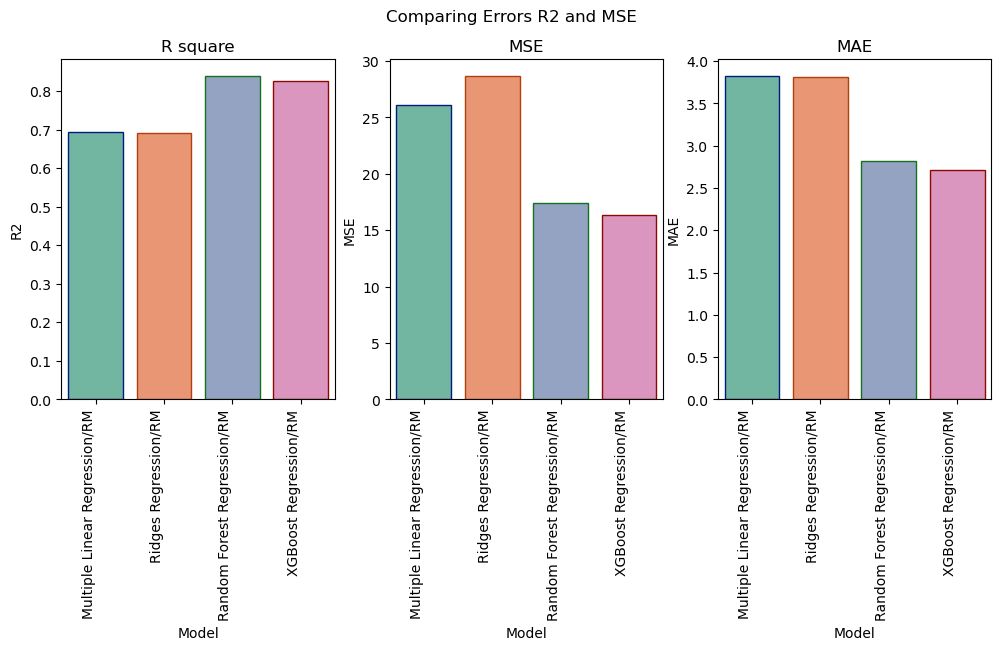

In [288]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results1_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results1_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results1_df, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

* **Observaciones**
* Random Forest IMP BP  y XGBoost Regression BP tienen mejores resultados en comparacion que el restos de los modelos.
* No existe mejora significativas con la remoción de la varaibles RM.
* No se observaron diferencia signifcativas entre el R2 del set del test con respecto al set de validación.

---

* **Entrenar el modelo utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.**

De todos los modelos evaluado sin la variable RM, el mejor resultado obtenido fue el de Random forest (base e importancia de variables), en este sentido se seleccionará buscar los mejores parametros y si es posible mejorarar su predicción.

**RANDOM FOREST REGRESIÓN**

In [289]:
# Intanciar modelo 
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)

#parametros de randon forest
rfr1.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [290]:
# https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
# look for params of our previous model 
from pprint import pprint

# Look at parameters used by our current forest
print('Parámetros actualmente en uso:\n')
pprint(rfr1.get_params())

Parámetros actualmente en uso:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Ahora se entrenará el modelo con los siguientes parámetros:

In [291]:
# Parameter grid
# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}

rfr1 = RandomForestRegressor(random_state = 42)

rfr1_random = RandomizedSearchCV(estimator = rfr1,
                                param_distributions = random_grid,
                                n_iter = 100, 
                                cv = 5, 
                                scoring='neg_mean_absolute_error', 
                                verbose=2, 
                                random_state=42, 
                                n_jobs = -1)


rfr1_random.fit(x1,y1.values.ravel())

rfr1_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [292]:
# base model with train data
# Predict with best parameters
rf1_bp = RandomForestRegressor(n_estimators=600,random_state = 42, min_samples_split=10, min_samples_leaf=2, 
                               max_features='auto', max_depth=100, bootstrap= True).fit(x1_train, y1_train)
y1_pred_rf_bp_val = rf1_bp.predict(x1_val)

evaluacion(y1_val, y1_pred_rf_bp_val)

R2 :  0.8041562866788512
MSE (Error cuadrático medio) :  12.60884690493903
MAE (Error Absoluto Medio) :  2.5839102387424315


In [294]:
# Predict with best parameters
rf1_bp = RandomForestRegressor(n_estimators=600,random_state = 42, min_samples_split=10, min_samples_leaf=2, 
                              max_features='auto', max_depth=100, bootstrap= True).fit(x1_train, y1_train)
y1_pred_rf1_bp = rf1_bp.predict(x1_test)

evaluacion(y1_test, y1_pred_rf1_bp)

R2 :  0.8370108639769587
MSE (Error cuadrático medio) :  15.139934420504437
MAE (Error Absoluto Medio) :  2.8123139986603616


Al igual que el modelo base, aplicando los mejores parametros al modelo, se obtuvieron una leve mejoria en los resultados, el R2 y la diferencia entre los dos valores de MAE (validation y test) una difrencia  menor con respecto el resto de los modelos evaluados. 

* **XGBoots Regression**

In [295]:
import xgboost as xgb

In [296]:
#intanciar el modelo
xgbr = XGBRegressor (use_label_encoder=False)

# we define the parameters we want to evaluate: 
params = { 'max_depth': [3,5,7,9,12,15,17,25], 'learning_rate': [0.001, 0.01, 0.1, 1.0], 'colsample_bytree': [0.3, 0.7]}

tuned_xgbr = xgb.XGBRegressor()

clf = GridSearchCV(estimator= tuned_xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(x1,y1)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3}
Lowest RMSE:  4.913473343908605


In [297]:
xgbr_bp = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth= 3)

# fit train set 
xgbr_bp.fit(x1_train, y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [298]:
# base model with validation data
# Predict with best parameters
y_pred_xgbr_bp_val1 = xgbr_bp.predict(x1_val)

evaluacion(y1_val, y_pred_xgbr_bp_val1)

R2 :  0.8546368998971243
MSE (Error cuadrático medio) :  9.358794539495484
MAE (Error Absoluto Medio) :  2.233248849562657


In [300]:
# Predict with best parameters Test Data
y1_pred_xgbr_bp = xgbr_bp.predict(x1_test)

evaluacion(y1_test, y1_pred_xgbr_bp)

R2 :  0.8161041526124847
MSE (Error cuadrático medio) :  17.081942622583654
MAE (Error Absoluto Medio) :  2.912402714935004


El modelo de XGBOOST aplicando el mejor parametros, al igual que el modelo base, obtuvo una ligera mejora en los R2, sin embargo el R2 del test es menor a la data de la validación.

* **Comparar los modelos** 

In [302]:
results1_df2 = pd.DataFrame(data = [['Random Forest Regression/R BP', get_results(y1_test, y1_pred_rf1_bp)[0], 
                        get_results(y1_test, y1_pred_rf1_bp)[1], get_results(y1_test, y1_pred_rf1_bp)[2]], 
                                  ['XGBoost Regression/RM BP', get_results(y1_test, y1_pred_xgbr_bp)[0], 
                        get_results(y1_test, y1_pred_xgbr_bp)[1], get_results(y1_test, y1_pred_xgbr_bp)[2]]], 
                        columns = ['Model', 'R2', 'MSE', 'MAE'])

In [303]:
results1_df_3 = pd.concat([results1_df, results1_df2]).reset_index(drop=True)
results1_df_3

Model        R2        MSE       MAE
0  Multiple Linear Regression/RM  0.693925  26.118863  3.830211
1           Ridges Regression/RM  0.690794  28.721885  3.807074
2    Random Forest Regression/RM  0.840618  17.419221  2.820392
3          XGBoost Regression/RM  0.826914  16.392795  2.717688
4  Random Forest Regression/R BP  0.837011  15.139934  2.812314
5       XGBoost Regression/RM BP  0.816104  17.081943  2.912403

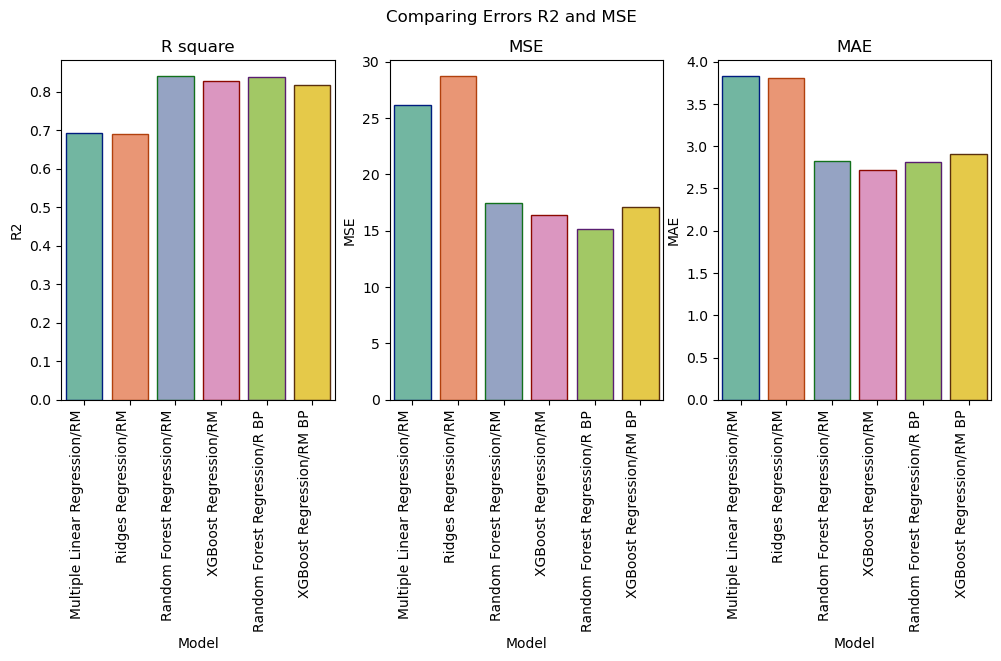

In [304]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

---

* **Aplicar crossvalidation (validación interna).**

   * De todos los modelos evaluado, el mejor resultado fue el Random forest , en este sentido se seleccionaran para la validación interna.
   * Para hacer la comparativa de validaciones con los diferentes data sets (todos los datos) del modelo, nuevamente realizaré la instanciación de los modelos seleccionados con los mejores parámetros encontrado.

**RANDOM FOREST REGRESIÓN**

* **Modelo Base**

In [305]:
## Instanciar el modelo con los mejores parametros
rfr1 = RandomForestRegressor(n_estimators = 600, min_samples_split = 10, min_samples_leaf = 2, max_features='auto', 
                             max_depth=100, bootstrap = True, random_state = 42)

In [312]:
# apply cross validation for r2
r2_scores_rfr1 = cross_val_score(rfr1, x1, y1, cv = 5, scoring = 'r2')
r2_rfr1 =np.mean(r2_scores_rfr1).round(4)
print('Métricas: ', r2_scores_rfr1)
print ('Media métricas: ', r2_rfr1)

Métricas:  [0.6492686  0.81709927 0.43275675 0.65500695 0.40297669]
Media métricas:  0.5914


In [313]:
# apply cross validation for mse
mse_scores_rfr1 = cross_val_score(rfr1, x1, y1, cv=5, scoring='neg_mean_squared_error')
mse_rfr1  = abs(np.mean(mse_scores_rfr1))
print('Métricas: ', mse_scores_rfr1)
print ('Media métricas: ', mse_rfr1)

Métricas:  [-12.11257745 -16.65068873 -45.42892528 -30.25997909 -15.8738449 ]
Media métricas:  24.065203090049543


In [314]:
# apply cross validation for MAE
mae_scores_rfr1 = cross_val_score(rfr1, x1, y1, cv=5, scoring='neg_mean_absolute_error')
mae_rfr1  = abs(np.mean(mae_scores_rfr1))
print('Métricas: ', mae_scores_rfr1)
print ('Media métricas: ', mae_rfr1)

Métricas:  [-2.89145111 -2.82516701 -5.07010904 -3.75345411 -2.90909676]
Media métricas:  3.489855605720101


In [315]:
# save it to a dataframe 
rfr1_results = pd.DataFrame(data = [['Random Forest Regression/RM BP_CV', r2_rfr1, mse_rfr1, mae_rfr1]], 
                              columns = ['Model', 'R2', 'MSE', 'MAE'])
rfr1_results

Model      R2        MSE       MAE
0  Random Forest Regression/RM BP_CV  0.5914  24.065203  3.489856

* **Comparar los modelos** 

In [316]:
results1_df_4 = pd.concat([results1_df_3, rfr1_results]).reset_index(drop=True)
results1_df_4

Model        R2        MSE       MAE
0      Multiple Linear Regression/RM  0.693925  26.118863  3.830211
1               Ridges Regression/RM  0.690794  28.721885  3.807074
2        Random Forest Regression/RM  0.840618  17.419221  2.820392
3              XGBoost Regression/RM  0.826914  16.392795  2.717688
4      Random Forest Regression/R BP  0.837011  15.139934  2.812314
5           XGBoost Regression/RM BP  0.816104  17.081943  2.912403
6  Random Forest Regression/RM BP_CV  0.591400  24.065203  3.489856

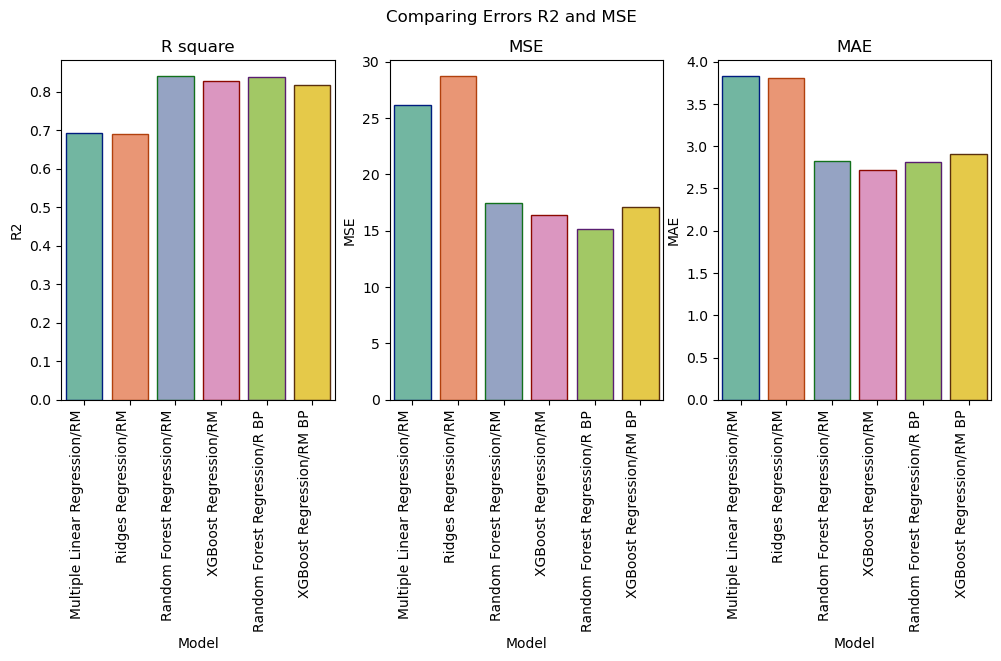

In [317]:
# Creating plot to show the diferent model rsquare
fig, axes = plt.subplots(1,3, figsize = (12,5))
fig.suptitle('Comparing Errors R2 and MSE')

sns.barplot(ax=axes[0], x="Model", y="R2", data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('R square')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="MSE",data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[1].set_title('MSE')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[2], x="Model", y="MAE",data=results1_df_3, palette='Set2',edgecolor=sns.color_palette('dark',7))
ax.tick_params(axis='x', labelrotation = 90)
axes[2].set_title('MAE')
fig.autofmt_xdate(rotation=90)

plt.show()

---

* **Comparar los modelos con y sin la variable RM** 

In [329]:
results_final = pd.concat([results_df_3, results1_df_4]).reset_index(drop=True)
results_final

Model        R2        MSE       MAE
0           Multiple Linear Regression  0.739680  26.118863  3.478967
1             MLR Regularizacion Ridge  0.738659  26.221260  3.419286
2             Random Forest Regression  0.826387  17.419221  2.586260
3         Random Forest Regression IMP  0.874364  11.670192  2.165588
4          Random Forest Regression BP  0.827163  17.341354  2.607565
5      Random Forest Regression IMP BP  0.874369  11.669761  2.110642
6                   XGBoost Regression  0.836617  16.392795  2.548335
7                XGBoost Regression BP  0.875304  12.511145  2.396988
8       Random Forest Regression BP_CV  0.627200  21.322560  2.994119
9   Random Forest Regression IMP BP_CV  0.647580  20.111665  2.990186
10            XGBoost Regression BP_CV  0.659500  19.657771  3.011764
11       Multiple Linear Regression/RM  0.693925  26.118863  3.830211
12                Ridges Regression/RM  0.690794  28.721885  3.807074
13         Random Forest Regression/RM  0.840618  17.419221  2.820392
14               XGBoost Regression/RM  0.826914  16.392795  2.717688
15       Random Forest Regression/R BP  0.837011  15.139934  2.812314
16            XGBoost Regression/RM BP  0.816104  17.081943  2.912403
17   Random Forest Regression/RM BP_CV  0.591400  24.065203  3.489856

**Conclusiones:**

* Los mejores resultados se obtuvieron con el algoritmo de Randon Forest regression y XGBoost Regression, tanto para los modelos con la variables RM como con los modelos sin la variable. 
* Al buscar los mejores parámetros se pudo observar una mejora en el R2 y una disminución entre el MAE de la validación y train. 
* Al aplicar Cross validatios los valores de R2 bajaron drasticamente por debajo de los 0.66, pudiendose inferir que hay algun fallo en el pre-procesamiento de los atributos o es posible que faltan más datos para entrenar o hay una sobre dimension de las variables independintes.
* Es importante resaltar, que una vez aplicado el robuscaler para minimizar los outliers, los mismos no mejoraron sigficativamente, lo que pudiera estar afectando los resultados obtenidos.

<div class="alert alert-success">
  <strong>Recomendaciones:</strong> En general, se puede observar algun fallo en el pre-procesamiento de los datos o alguna sobredimesión de las variables a utilizar para predecir los modelos, en este sentido se recomienda:
     * Revisar la simetria​ de algunas variables, aplicando un tipo de transformación, previo la normalizacion de los atributos a utilizar. 
        * Si una vez aplicado un tipo de transformacion para la correción de simetria y se aplica la normalización de los outlieres, persiste un alto % de los mismo, es recomedable realizar algun tipo de imputación, bien sea usando la media o el perceltil mayor.    
    * Revisar los valores usado para el train y test asi como los valores a iterar en el crossvalidation.
    * Utilizar técnicas de regularización para evitar el sobreajuste
</div>